# forex time series prediction

In [1006]:
# !pip install pandas_ta

In [1007]:
# !pip install yfinance

In [1008]:
# ! pip install pandas_datareader

https://forecast.nanoquant.ru/metric/pcdp.htm

https://algotrading101.com/learn/yfinance-guide/

In [1009]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_ta as ta
import yfinance as yf
import requests
import pandas_datareader as pdr
import datetime as dt

yfinance.Ticker object <AAPL>
Remember we now use this aapl ticker object for almost everything- calling various methods on it.

To get the historical data we want to use the history() method, which is the most “complicated” method in the yfinance library.

It takes the following parameters as input:

period: data period to download (either use period parameter or use start and end) Valid periods are:
“1d”, “5d”, “1mo”, “3mo”, “6mo”, “1y”, “2y”, “5y”, “10y”, “ytd”, “max”
interval: data interval (1m data is only for available for last 7 days, and data interval <1d for the last 60 days) Valid intervals are:
“1m”, “2m”, “5m”, “15m”, “30m”, “60m”, “90m”, “1h”, “1d”, “5d”, “1wk”, “1mo”, “3mo”
start: If not using period – in the format (yyyy-mm-dd) or datetime.
end: If not using period – in the format (yyyy-mm-dd) or datetime.
prepost: Include Pre and Post regular market data in results? (Default is False)- no need usually to change this from False
auto_adjust: Adjust all OHLC (Open/High/Low/Close prices) automatically? (Default is True)- just leave this always as true and don’t worry about it
actions: Download stock dividends and stock splits events? (Default is True)
That might look a little complex but mainly you will just be changing the period (or start and end) and interval parameters.

In [1010]:
# msft = yf.Ticker("EURUSD=X")
# # get historical market data
# hist = msft.history(interval = '1h', period = '2y')
# hist.to_csv('hist_eurusd_1h.csv', mode='w')

In [1125]:
df = pd.read_csv('hist_eurusd_1h.csv')

In [1126]:
df.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-03-29 07:00:00+01:00,1.098901,1.101200,1.098780,1.100715,0,0.0,0.0
1,2022-03-29 08:00:00+01:00,1.100837,1.101928,1.100231,1.100352,0,0.0,0.0
2,2022-03-29 09:00:00+01:00,1.100231,1.100837,1.098177,1.098660,0,0.0,0.0
3,2022-03-29 10:00:00+01:00,1.098418,1.104728,1.097815,1.104118,0,0.0,0.0
4,2022-03-29 11:00:00+01:00,1.104118,1.106195,1.103875,1.104850,0,0.0,0.0


In [1127]:
df = df[['Datetime', 'Open', 'High', 'Low', 'Close']]

In [1128]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(12416, 5)

In [1129]:
df.ta.categories # категории

['candles',
 'cycles',
 'momentum',
 'overlap',
 'performance',
 'statistics',
 'trend',
 'volatility',
 'volume']

In [1130]:
df.ta.indicators(as_list = True) # индикаторы

['aberration',
 'above',
 'above_value',
 'accbands',
 'ad',
 'adosc',
 'adx',
 'alma',
 'amat',
 'ao',
 'aobv',
 'apo',
 'aroon',
 'atr',
 'bbands',
 'below',
 'below_value',
 'bias',
 'bop',
 'brar',
 'cci',
 'cdl_pattern',
 'cdl_z',
 'cfo',
 'cg',
 'chop',
 'cksp',
 'cmf',
 'cmo',
 'coppock',
 'cross',
 'cross_value',
 'cti',
 'decay',
 'decreasing',
 'dema',
 'dm',
 'donchian',
 'dpo',
 'ebsw',
 'efi',
 'ema',
 'entropy',
 'eom',
 'er',
 'eri',
 'fisher',
 'fwma',
 'ha',
 'hilo',
 'hl2',
 'hlc3',
 'hma',
 'hwc',
 'hwma',
 'ichimoku',
 'increasing',
 'inertia',
 'jma',
 'kama',
 'kc',
 'kdj',
 'kst',
 'kurtosis',
 'kvo',
 'linreg',
 'log_return',
 'long_run',
 'macd',
 'mad',
 'massi',
 'mcgd',
 'median',
 'mfi',
 'midpoint',
 'midprice',
 'mom',
 'natr',
 'nvi',
 'obv',
 'ohlc4',
 'pdist',
 'percent_return',
 'pgo',
 'ppo',
 'psar',
 'psl',
 'pvi',
 'pvo',
 'pvol',
 'pvr',
 'pvt',
 'pwma',
 'qqe',
 'qstick',
 'quantile',
 'rma',
 'roc',
 'rsi',
 'rsx',
 'rvgi',
 'rvi',
 'short_run'

In [1131]:
len(df.ta.indicators(as_list = True)) # количество возможных индикаторов

143

In [1132]:
df['rsi'] = ta.rsi(close = df.Close, lenght = 10)
df['ema'] = ta.ema(close = df.Close, lenght = 10)
df['sma'] = ta.sma(close = df.Close, lenght = 10)

<function matplotlib.pyplot.show(close=None, block=None)>

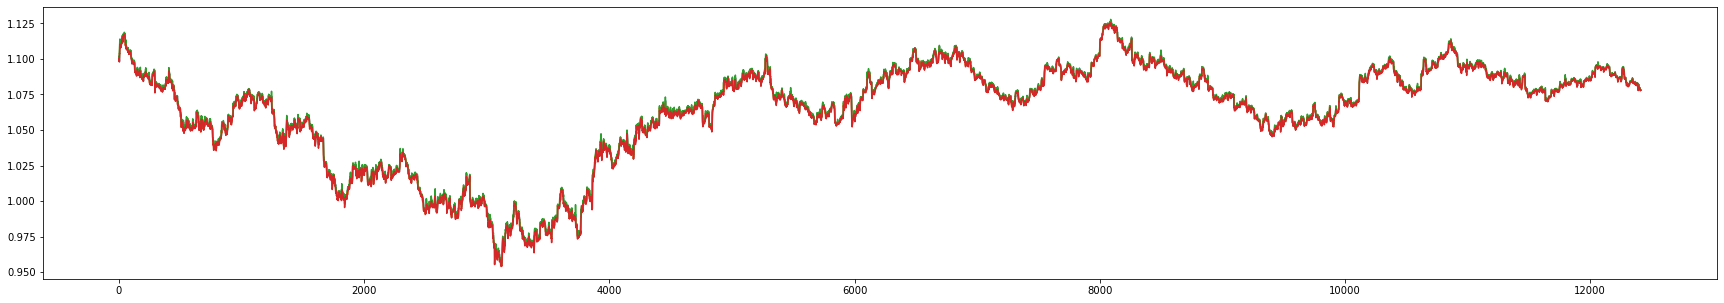

In [1135]:
plt.figure(figsize = (30, 5)) # график временного ряда свечи

plt.plot(df.Open)
plt.plot(df.Close)
plt.plot(df.High)
plt.plot(df.Low)
plt.show

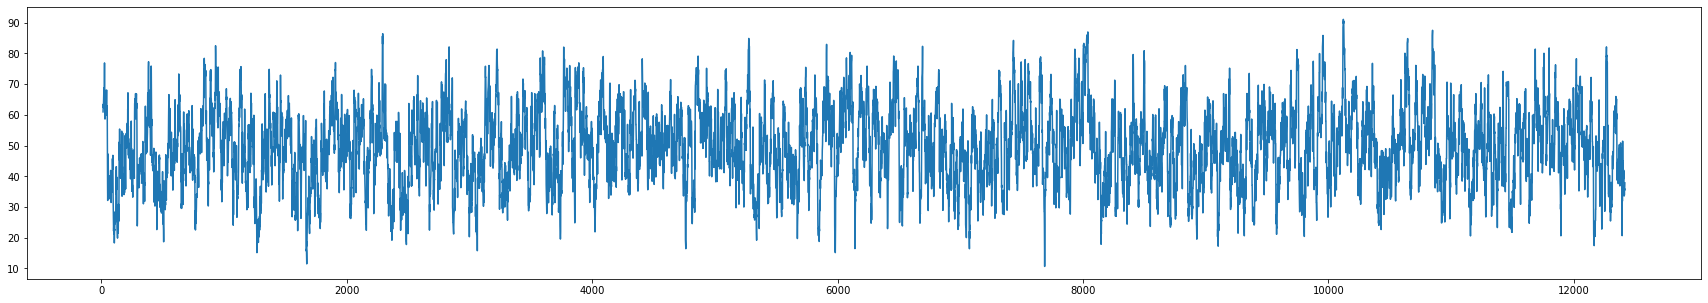

In [1137]:
plt.figure(figsize = (30, 5)) #график rsi
plt.plot(df.rsi)

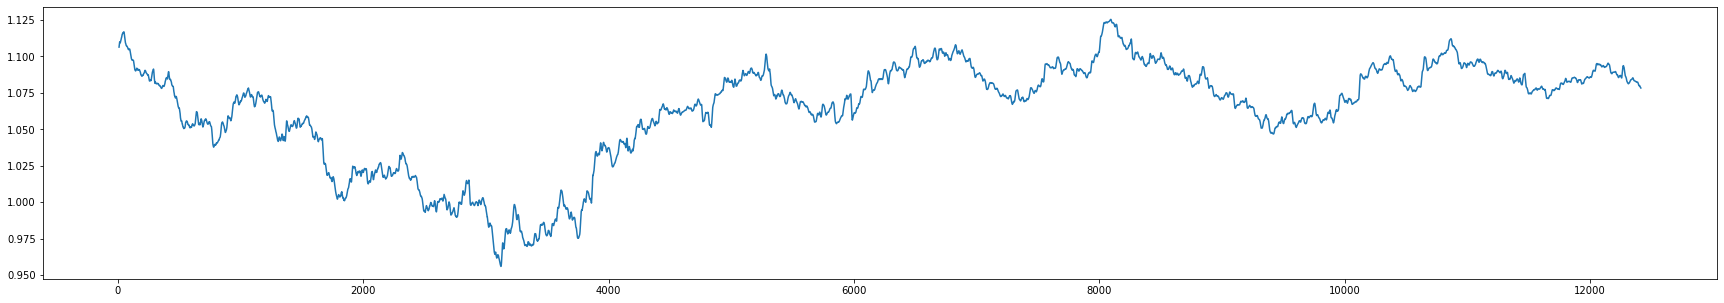

In [1138]:
plt.figure(figsize = (30, 5)) # sma
plt.plot(df.sma)

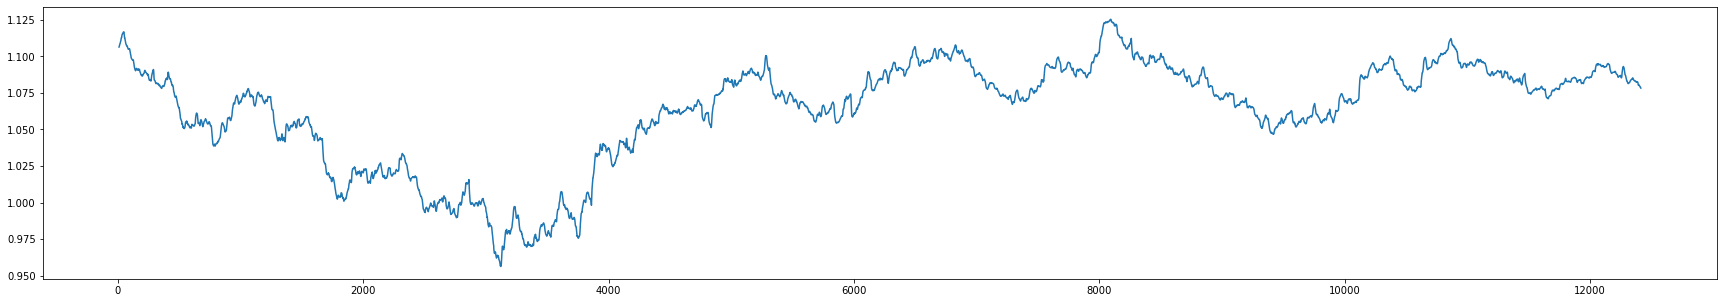

In [1139]:
plt.figure(figsize = (30, 5)) # ema
plt.plot(df.ema)

In [1140]:
df.head(20)

,Datetime,Open,High,Low,Close,rsi,ema,sma
0,2022-03-29 07:00:00+01:00,1.098901,1.101200,1.098780,1.100715,NaN,NaN,NaN
1,2022-03-29 08:00:00+01:00,1.100837,1.101928,1.100231,1.100352,NaN,NaN,NaN
2,2022-03-29 09:00:00+01:00,1.100231,1.100837,1.098177,1.098660,NaN,NaN,NaN
3,2022-03-29 10:00:00+01:00,1.098418,1.104728,1.097815,1.104118,NaN,NaN,NaN
4,2022-03-29 11:00:00+01:00,1.104118,1.106195,1.103875,1.104850,NaN,NaN,NaN
5,2022-03-29 12:00:00+01:00,1.104850,1.109755,1.103631,1.108402,NaN,NaN,NaN
6,2022-03-29 13:00:00+01:00,1.108402,1.113090,1.108402,1.111976,NaN,NaN,NaN
7,2022-03-29 14:00:00+01:00,1.111482,1.113834,1.110248,1.113462,NaN,NaN,NaN
8,2022-03-29 15:00:00+01:00,1.113710,1.113710,1.109509,1.110124,NaN,NaN,NaN
9,2022-03-29 16:00:00+01:00,1.110864,1.111976,1.110248,1.111235,NaN,1.106389,1.106389


In [1024]:
df.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema', 'sma'], dtype='object')

In [1141]:
x_len = 60 #анализируем 60 точек предыдущего периода
for i in range(x_len, 0, -1):
    df['Open'+str(i)+'h_back'] = df['Open'].shift(i, axis = 0)
    df['High'+str(i)+'h_back'] = df['High'].shift(i, axis = 0)
    df['Low'+str(i)+'h_back'] = df['Low'].shift(i, axis = 0)
    df['Close'+str(i)+'h_back'] = df['Close'].shift(i, axis = 0)    
    df['rsi'+str(i)+'h_back'] = df['rsi'].shift(i, axis = 0)
    df['ema'+str(i)+'h_back'] = df['ema'].shift(i, axis = 0)
    df['sma'+str(i)+'h_back'] = df['sma'].shift(i, axis = 0)

/tmp/ipykernel_394938/3138868245.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsi'+str(i)+'h_back'] = df['rsi'].shift(i, axis = 0)
/tmp/ipykernel_394938/3138868245.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ema'+str(i)+'h_back'] = df['ema'].shift(i, axis = 0)
/tmp/ipykernel_394938/3138868245.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

In [1142]:
df.shape

(12416, 428)

In [1143]:
df = df.dropna().reset_index()

In [1144]:
df.shape

(12342, 429)

In [1145]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Dropout,  SimpleRNN, SimpleRNNCell
from tensorflow.keras.models import Model, Sequential
import keras

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

import numpy as np

import seaborn as sns

from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

In [1147]:
df.tail(10)

,index,Datetime,Open,High,Low,Close,rsi,ema,sma,Open60h_back,...,rsi2h_back,ema2h_back,sma2h_back,Open1h_back,High1h_back,Low1h_back,Close1h_back,rsi1h_back,ema1h_back,sma1h_back
12332,12406,2024-03-28 22:00:00+00:00,1.079098,1.079447,1.079098,1.079447,41.937869,1.079636,1.079844,1.085658,...,39.124431,1.079781,1.079926,1.079331,1.079797,1.078981,1.079214,40.045570,1.079678,1.079984
12333,12407,2024-03-28 23:00:00+00:00,1.079214,1.079564,1.078981,1.079447,41.937869,1.079602,1.079611,1.085776,...,40.045570,1.079678,1.079984,1.079098,1.079447,1.079098,1.079447,41.937869,1.079636,1.079844
12334,12408,2024-03-29 00:00:00+00:00,1.079447,1.079447,1.078865,1.078865,38.422473,1.079468,1.079459,1.086012,...,41.937869,1.079636,1.079844,1.079214,1.079564,1.078981,1.079447,41.937869,1.079602,1.079611
12335,12409,2024-03-29 01:00:00+00:00,1.078749,1.078749,1.077935,1.077935,33.578951,1.079189,1.079215,1.085423,...,41.937869,1.079602,1.079611,1.079447,1.079447,1.078865,1.078865,38.422473,1.079468,1.079459
12336,12410,2024-03-29 02:00:00+00:00,1.077935,1.078283,1.077702,1.078283,36.794986,1.079024,1.079028,1.085541,...,38.422473,1.079468,1.079459,1.078749,1.078749,1.077935,1.077935,33.578951,1.079189,1.079215
12337,12411,2024-03-29 03:00:00+00:00,1.078167,1.078167,1.077702,1.077702,33.852969,1.078784,1.078819,1.084481,...,33.578951,1.079189,1.079215,1.077935,1.078283,1.077702,1.078283,36.794986,1.079024,1.079028
12338,12412,2024-03-29 04:00:00+00:00,1.077819,1.077935,1.077819,1.077935,36.055414,1.078630,1.078702,1.083072,...,36.794986,1.079024,1.079028,1.078167,1.078167,1.077702,1.077702,33.852969,1.078784,1.078819
12339,12413,2024-03-29 05:00:00+00:00,1.078051,1.078051,1.077819,1.077819,35.420372,1.078482,1.078575,1.083189,...,33.852969,1.078784,1.078819,1.077819,1.077935,1.077819,1.077935,36.055414,1.078630,1.078702
12340,12414,2024-03-29 06:00:00+00:00,1.077819,1.078051,1.077819,1.077935,36.622503,1.078383,1.078458,1.083306,...,36.055414,1.078630,1.078702,1.078051,1.078051,1.077819,1.077819,35.420372,1.078482,1.078575
12341,12415,2024-03-29 07:00:00+00:00,1.077935,1.078051,1.077935,1.078051,37.866786,1.078322,1.078342,1.083541,...,35.420372,1.078482,1.078575,1.077819,1.078051,1.077819,1.077935,36.622503,1.078383,1.078458


In [1148]:
df.shape

(12342, 429)

In [1149]:
df.columns

Index(['index', 'Datetime', 'Open', 'High', 'Low', 'Close', 'rsi', 'ema',
       'sma', 'Open60h_back',
       ...
       'rsi2h_back', 'ema2h_back', 'sma2h_back', 'Open1h_back', 'High1h_back',
       'Low1h_back', 'Close1h_back', 'rsi1h_back', 'ema1h_back', 'sma1h_back'],
      dtype='object', length=429)

In [1150]:
scaler = MinMaxScaler()

# open low high close

# Обучим рекуррентную сеть

In [1151]:
df

,index,Datetime,Open,High,Low,Close,rsi,ema,sma,Open60h_back,...,rsi2h_back,ema2h_back,sma2h_back,Open1h_back,High1h_back,Low1h_back,Close1h_back,rsi1h_back,ema1h_back,sma1h_back
0,74,2022-04-01 09:00:00+01:00,1.105217,1.107788,1.105217,1.106317,36.813167,1.107006,1.106942,1.109016,...,40.226387,1.107455,1.107224,1.107665,1.107665,1.104728,1.105828,33.627442,1.107159,1.107089
1,75,2022-04-01 10:00:00+01:00,1.105950,1.106195,1.104484,1.105828,35.003828,1.106792,1.106758,1.109016,...,33.627442,1.107159,1.107089,1.105217,1.107788,1.105217,1.106317,36.813167,1.107006,1.106942
2,76,2022-04-01 11:00:00+01:00,1.106439,1.106929,1.105217,1.106929,41.924485,1.106817,1.106746,1.109139,...,36.813167,1.107006,1.106942,1.105950,1.106195,1.104484,1.105828,35.003828,1.106792,1.106758
3,77,2022-04-01 12:00:00+01:00,1.106684,1.106684,1.105461,1.105461,36.366471,1.106570,1.106538,1.109755,...,35.003828,1.106792,1.106758,1.106439,1.106929,1.105217,1.106929,41.924485,1.106817,1.106746
4,78,2022-04-01 13:00:00+01:00,1.105339,1.106195,1.104362,1.104850,34.328156,1.106258,1.106354,1.109385,...,41.924485,1.106817,1.106746,1.106684,1.106684,1.105461,1.105461,36.366471,1.106570,1.106538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12337,12411,2024-03-29 03:00:00+00:00,1.078167,1.078167,1.077702,1.077702,33.852969,1.078784,1.078819,1.084481,...,33.578951,1.079189,1.079215,1.077935,1.078283,1.077702,1.078283,36.794986,1.079024,1.079028
12338,12412,2024-03-29 04:00:00+00:00,1.077819,1.077935,1.077819,1.077935,36.055414,1.078630,1.078702,1.083072,...,36.794986,1.079024,1.079028,1.078167,1.078167,1.077702,1.077702,33.852969,1.078784,1.078819
12339,12413,2024-03-29 05:00:00+00:00,1.078051,1.078051,1.077819,1.077819,35.420372,1.078482,1.078575,1.083189,...,33.852969,1.078784,1.078819,1.077819,1.077935,1.077819,1.077935,36.055414,1.078630,1.078702
12340,12414,2024-03-29 06:00:00+00:00,1.077819,1.078051,1.077819,1.077935,36.622503,1.078383,1.078458,1.083306,...,36.055414,1.078630,1.078702,1.078051,1.078051,1.077819,1.077819,35.420372,1.078482,1.078575


In [1152]:
X = df.drop(['index', 'Datetime', 'Open', 'High', 'Low', 'Close','rsi', 'ema', 'sma'], axis = 1)
X

,Open60h_back,High60h_back,Low60h_back,Close60h_back,rsi60h_back,ema60h_back,sma60h_back,Open59h_back,High59h_back,Low59h_back,...,rsi2h_back,ema2h_back,sma2h_back,Open1h_back,High1h_back,Low1h_back,Close1h_back,rsi1h_back,ema1h_back,sma1h_back
0,1.109016,1.109385,1.108770,1.108770,60.977079,1.107910,1.109881,1.109016,1.109509,1.108156,...,40.226387,1.107455,1.107224,1.107665,1.107665,1.104728,1.105828,33.627442,1.107159,1.107089
1,1.109016,1.109509,1.108156,1.109509,62.874172,1.108201,1.109991,1.109139,1.110371,1.108893,...,33.627442,1.107159,1.107089,1.105217,1.107788,1.105217,1.106317,36.813167,1.107006,1.106942
2,1.109139,1.110371,1.108893,1.109755,63.511567,1.108483,1.109769,1.109755,1.110001,1.109385,...,36.813167,1.107006,1.106942,1.105950,1.106195,1.104484,1.105828,35.003828,1.106792,1.106758
3,1.109755,1.110001,1.109385,1.109509,62.358609,1.108670,1.109374,1.109385,1.110124,1.109139,...,35.003828,1.106792,1.106758,1.106439,1.106929,1.105217,1.106929,41.924485,1.106817,1.106746
4,1.109385,1.110124,1.109139,1.110001,63.775001,1.108912,1.109361,1.110124,1.111605,1.110124,...,41.924485,1.106817,1.106746,1.106684,1.106684,1.105461,1.105461,36.366471,1.106570,1.106538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12337,1.084481,1.084716,1.082837,1.082837,38.768990,1.084725,1.085094,1.083072,1.083541,1.082720,...,33.578951,1.079189,1.079215,1.077935,1.078283,1.077702,1.078283,36.794986,1.079024,1.079028
12338,1.083072,1.083541,1.082720,1.083306,42.573850,1.084467,1.084882,1.083189,1.083893,1.083189,...,36.794986,1.079024,1.079028,1.078167,1.078167,1.077702,1.077702,33.852969,1.078784,1.078819
12339,1.083189,1.083893,1.083189,1.083424,43.518536,1.084277,1.084788,1.083306,1.083776,1.083306,...,33.852969,1.078784,1.078819,1.077819,1.077935,1.077819,1.077935,36.055414,1.078630,1.078702
12340,1.083306,1.083776,1.083306,1.083541,44.502718,1.084143,1.084612,1.083541,1.083776,1.083189,...,36.055414,1.078630,1.078702,1.078051,1.078051,1.077819,1.077819,35.420372,1.078482,1.078575


In [1153]:
X = np.array(df.drop(['index', 'Datetime', 'Open', 'High', 'Low', 'Close','rsi', 'ema', 'sma'], axis = 1))
X = scaler.fit_transform(X)
X.shape

(12342, 420)

In [1154]:
X = X.reshape(12342, 60, 7)
X.shape

(12342, 60, 7)

In [1155]:
X[0][0]

array([0.90083145, 0.89268918, 0.90309745, 0.89899824, 0.62543578,
       0.89703908, 0.90826494])

In [1156]:
X_train = X[:9000]

X_train.shape

(9000, 60, 7)

In [1157]:
X_test = X[9000:]
X_test.shape

(3342, 60, 7)

In [1158]:
y = np.array(df[['Open', 'High', 'Low', 'Close']])
y.shape

(12342, 4)

In [1159]:
y

array([[1.10521662, 1.10778773, 1.10521662, 1.10631704],
       [1.10595   , 1.10619473, 1.1044842 , 1.10582769],
       [1.10643947, 1.10692942, 1.10521662, 1.10692942],
       ...,
       [1.07805085, 1.07805085, 1.07781851, 1.07781851],
       [1.07781851, 1.07805085, 1.07781851, 1.07793474],
       [1.07793474, 1.07805085, 1.07793474, 1.07805085]])

In [1160]:
y_train = y[:9000]
y_train.shape

(9000, 4)

In [1161]:
y_test = y[9000:]
y_test.shape

(3342, 4)

In [1162]:
model = Sequential()
model.add(LSTM(128, input_shape=(60, 7)))
model.add(Dense(4, activation='elu'))


model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 128)               69632     
                                                                 
 dense_22 (Dense)            (None, 4)                 516       
                                                                 
Total params: 70148 (274.02 KB)
Trainable params: 70148 (274.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1047]:
X_train.shape

(9000, 60, 7)

In [1048]:
# %%time
# model.fit(X_train, y_train,
#           epochs=5000,
#           validation_data=(X_test, y_test)
#           )

In [1049]:
#Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
# model.save("my_model.keras")

In [1050]:
# It can be used to reconstruct the model identically.
model = keras.models.load_model("my_model.keras")

In [1051]:
model.evaluate(X_test, y_test)

105/105 [==============================] - 1s 6ms/step - loss: 7.4330e-07 - mae: 6.5813e-04


[7.433037580995006e-07, 0.0006581305642612278]

In [1052]:
y_train.shape

(9000, 4)

In [1053]:
y_train_pred = np.array(model.predict(X_train))
y_train_pred.shape

282/282 [==============================] - 2s 6ms/step


(9000, 4)

In [1054]:
y_list = ['Open', 'High', 'Low', 'Close']

In [1055]:
df_evaluate = pd.DataFrame(y_train, columns = ['Open', 'High', 'Low', 'Close'])
df_evaluate[['Open_pred', 'High_pred', 'Low_pred', 'Close_pred']] = y_train_pred
df_evaluate

,Open,High,Low,Close,Open_pred,High_pred,Low_pred,Close_pred
0,1.105217,1.107788,1.105217,1.106317,1.106112,1.107490,1.104692,1.105931
1,1.105950,1.106195,1.104484,1.105828,1.106675,1.108050,1.105237,1.106472
2,1.106439,1.106929,1.105217,1.106929,1.106070,1.107373,1.104667,1.105845
3,1.106684,1.106684,1.105461,1.105461,1.107223,1.108561,1.105788,1.107011
4,1.105339,1.106195,1.104362,1.104850,1.105831,1.107102,1.104481,1.105617
...,...,...,...,...,...,...,...,...
8995,1.073307,1.074114,1.073192,1.073998,1.073716,1.074892,1.072569,1.073535
8996,1.074114,1.074345,1.073307,1.073998,1.074360,1.075521,1.073228,1.074181
8997,1.073998,1.076079,1.072156,1.075038,1.074406,1.075581,1.073268,1.074240
8998,1.074922,1.075732,1.073307,1.074460,1.075337,1.076841,1.073916,1.075224


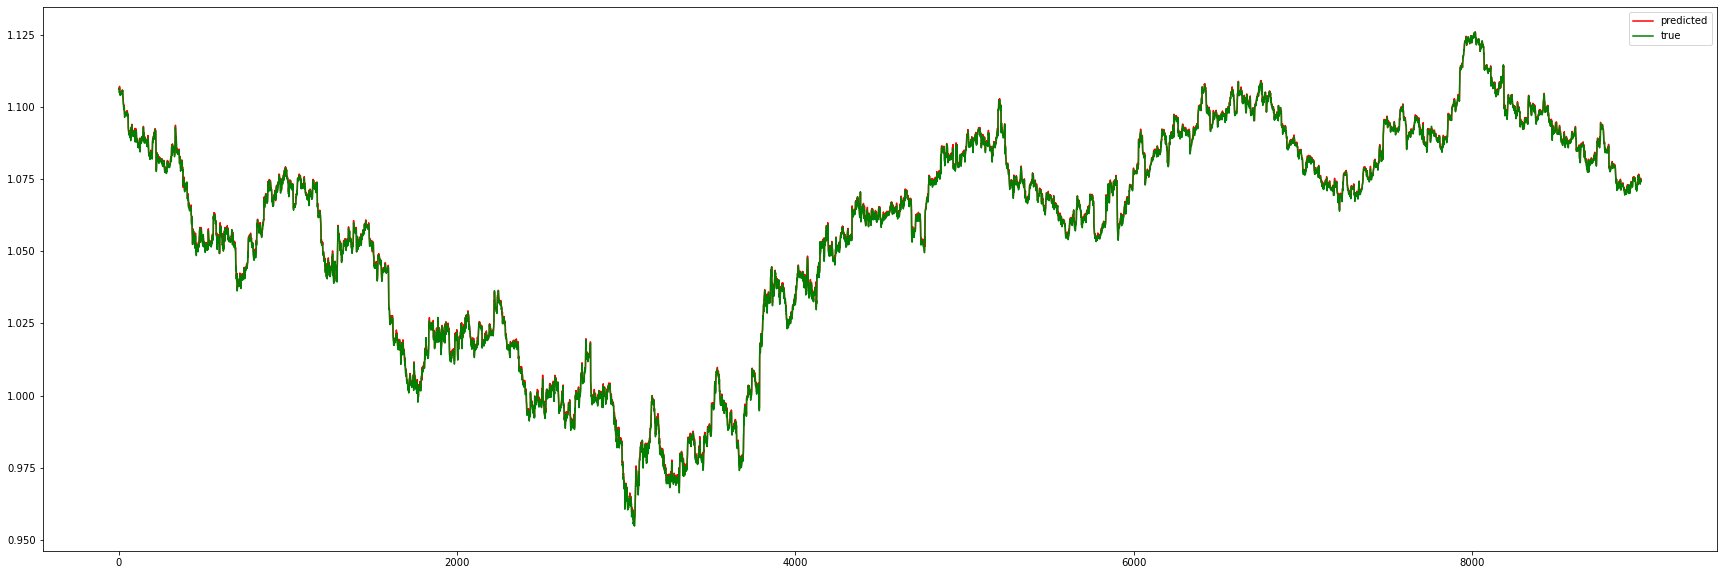

In [1056]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Open_pred'], 'r', label='predicted')
plt.plot(df_evaluate['Open'], 'g', label='true')
plt.legend();

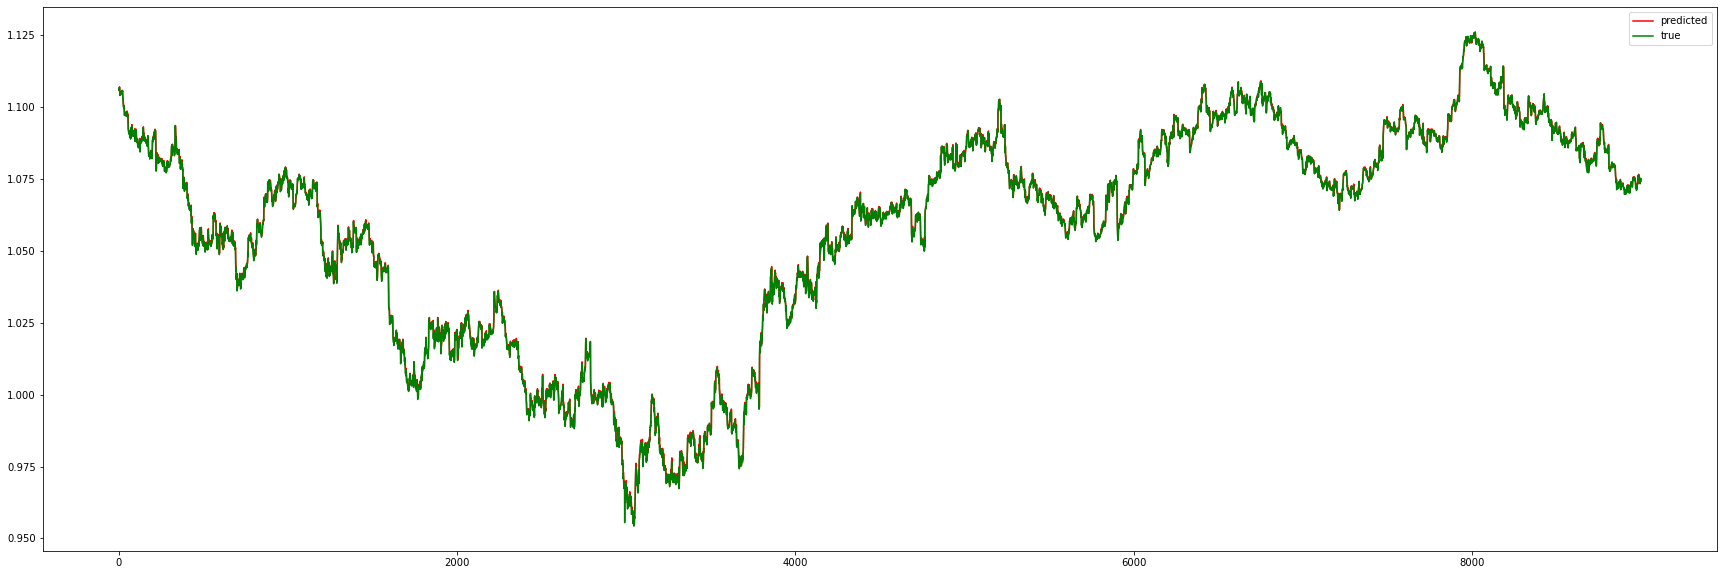

In [1057]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Close_pred'], 'r', label='predicted')
plt.plot(df_evaluate['Close'], 'g', label='true')
plt.legend();

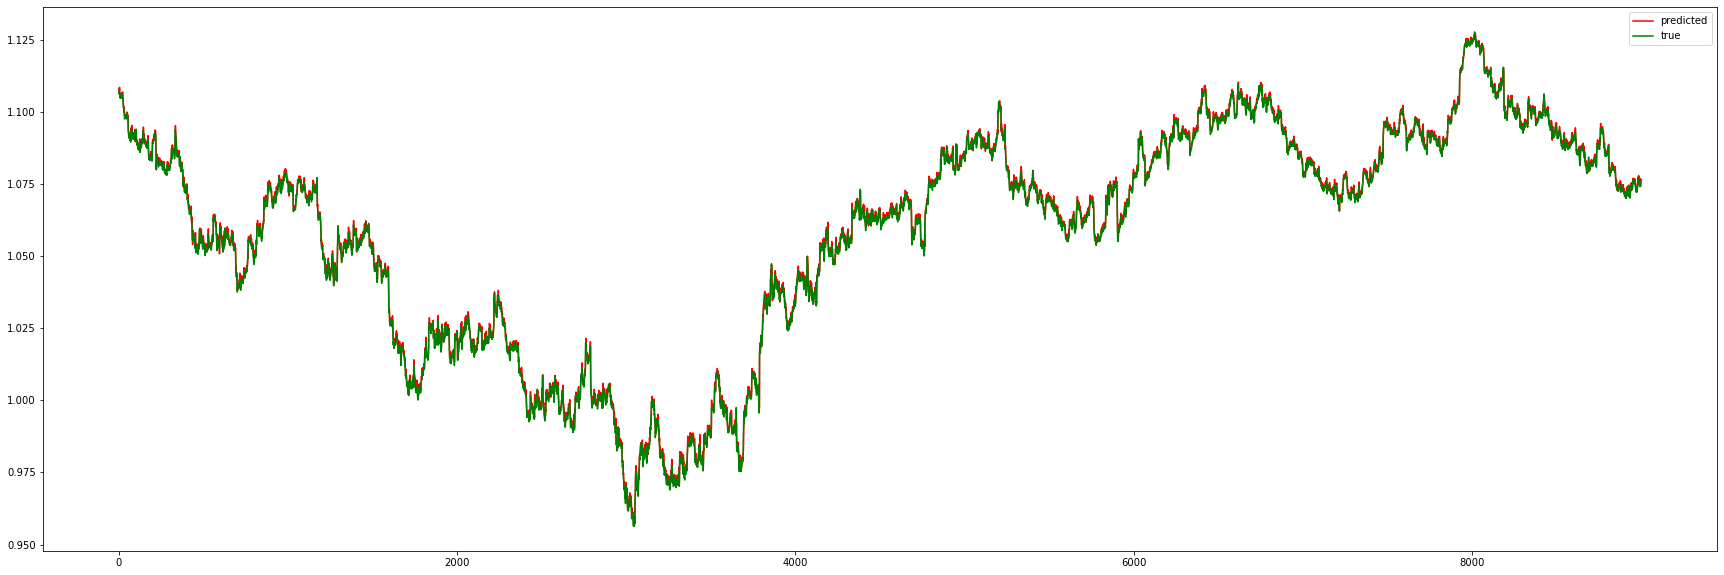

In [1058]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['High_pred'], 'r', label='predicted')
plt.plot(df_evaluate['High'], 'g', label='true')
plt.legend();

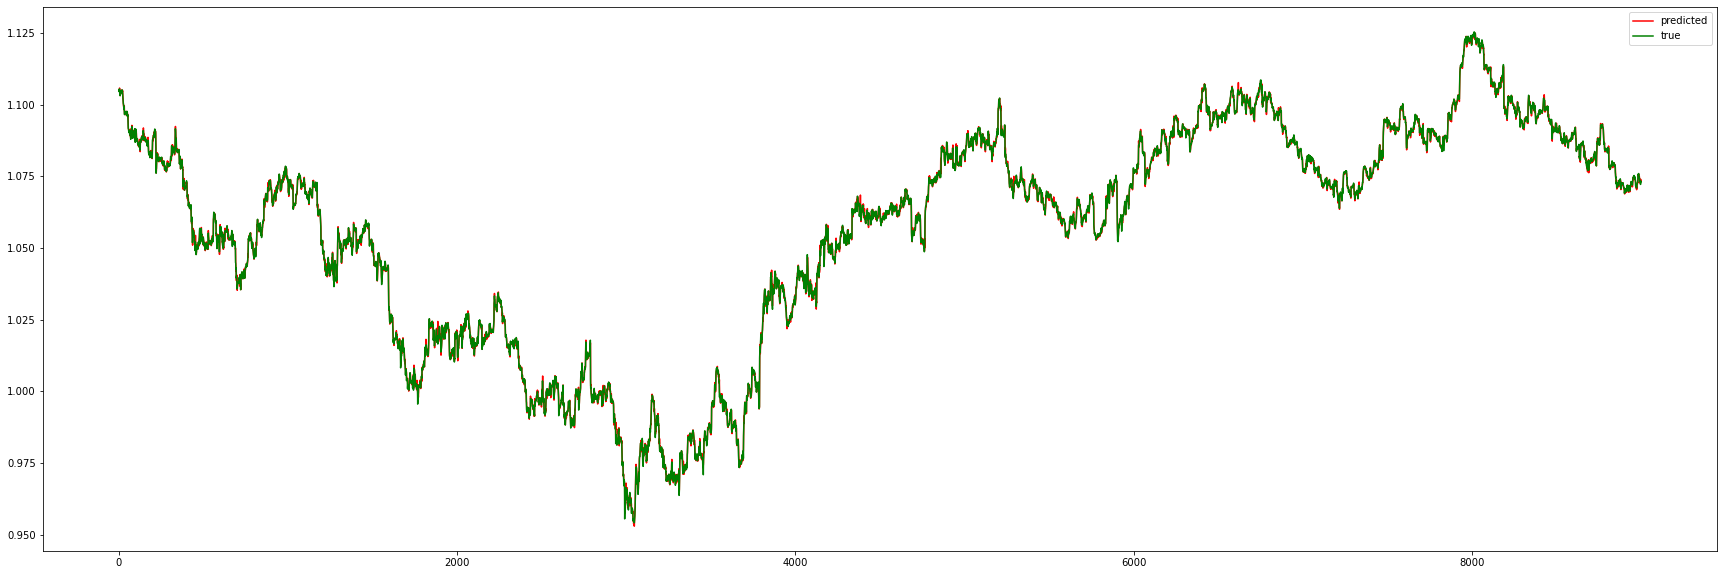

In [1059]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Low_pred'], 'r', label='predicted')
plt.plot(df_evaluate['Low'], 'g', label='true')
plt.legend();

# Проверим на тесте

In [1060]:
y_test_pred = np.array(model.predict(X_test))
y_test_pred.shape

105/105 [==============================] - 1s 6ms/step


(3342, 4)

In [1061]:
df_evaluate_test = pd.DataFrame(y_test, columns = ['Open', 'High', 'Low', 'Close'])
df_evaluate_test[['Open_pred', 'High_pred', 'Low_pred', 'Close_pred']] = y_test_pred
df_evaluate_test

,Open,High,Low,Close,Open_pred,High_pred,Low_pred,Close_pred
0,1.074114,1.074807,1.073537,1.073883,1.074425,1.075620,1.073243,1.074248
1,1.073998,1.074922,1.073883,1.074576,1.074338,1.075537,1.073163,1.074161
2,1.074345,1.075153,1.074114,1.075038,1.074983,1.076164,1.073825,1.074805
3,1.074807,1.075269,1.073537,1.073537,1.075409,1.076569,1.074282,1.075246
4,1.073422,1.073883,1.073076,1.073422,1.074015,1.075235,1.072857,1.073879
...,...,...,...,...,...,...,...,...
3337,1.078167,1.078167,1.077702,1.077702,1.078596,1.079591,1.077690,1.078452
3338,1.077819,1.077935,1.077819,1.077935,1.078129,1.079133,1.077218,1.077985
3339,1.078051,1.078051,1.077819,1.077819,1.078316,1.079304,1.077401,1.078153
3340,1.077819,1.078051,1.077819,1.077935,1.078259,1.079278,1.077309,1.078098


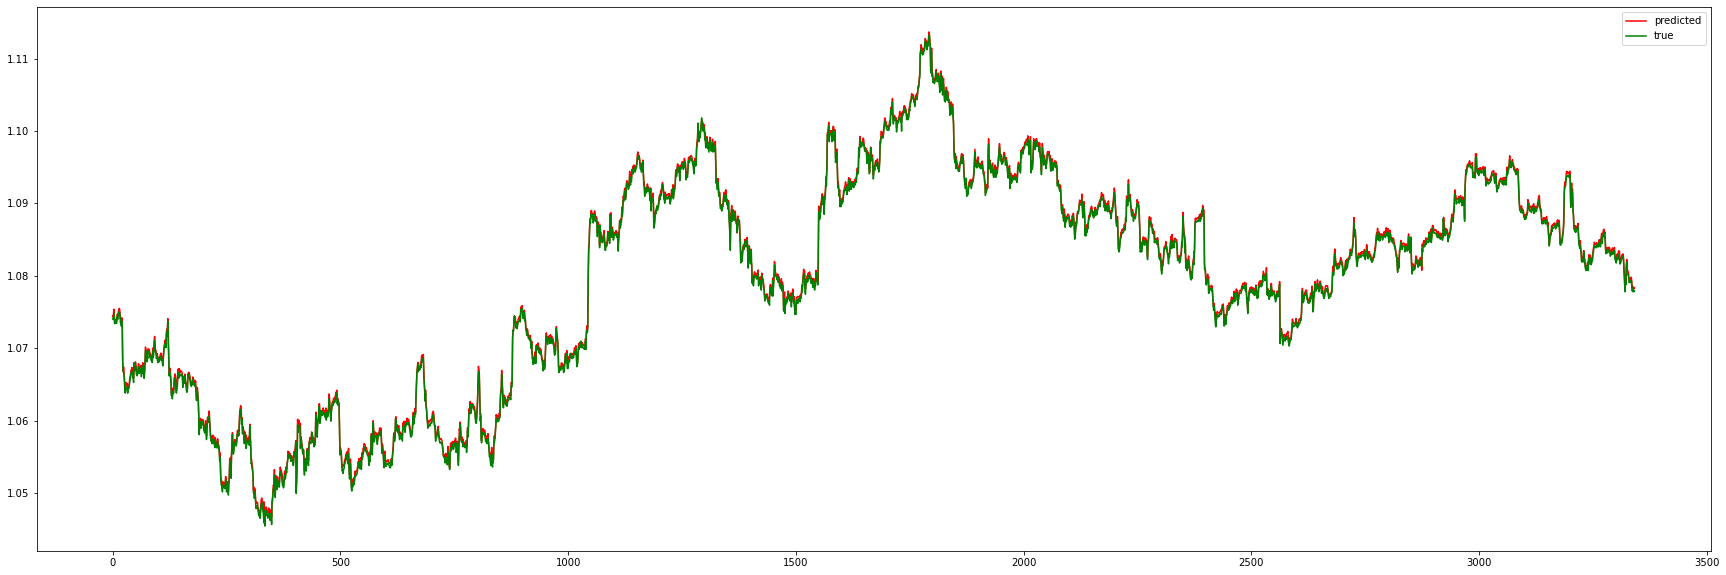

In [1062]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate_test['Open_pred'], 'r', label='predicted')
plt.plot(df_evaluate_test['Open'], 'g', label='true')
plt.legend();

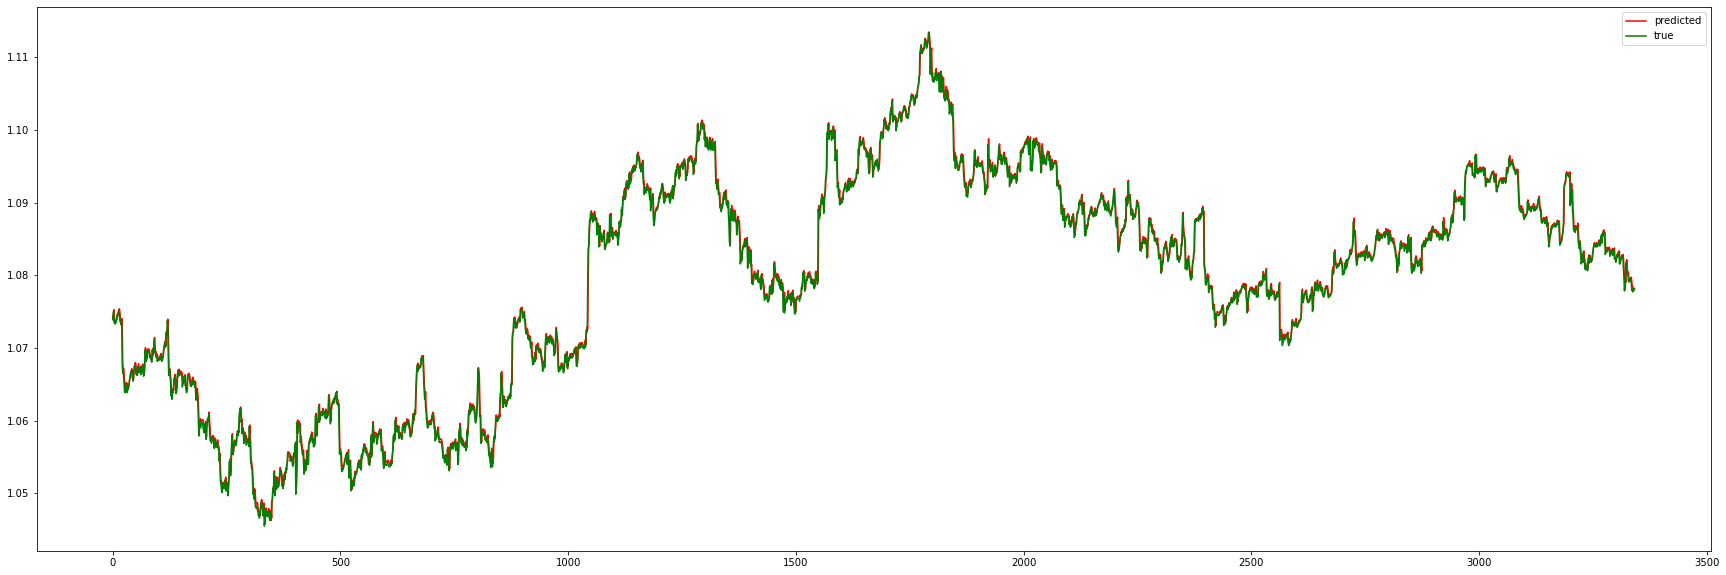

In [1063]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate_test['Close_pred'], 'r', label='predicted')
plt.plot(df_evaluate_test['Close'], 'g', label='true')
plt.legend();

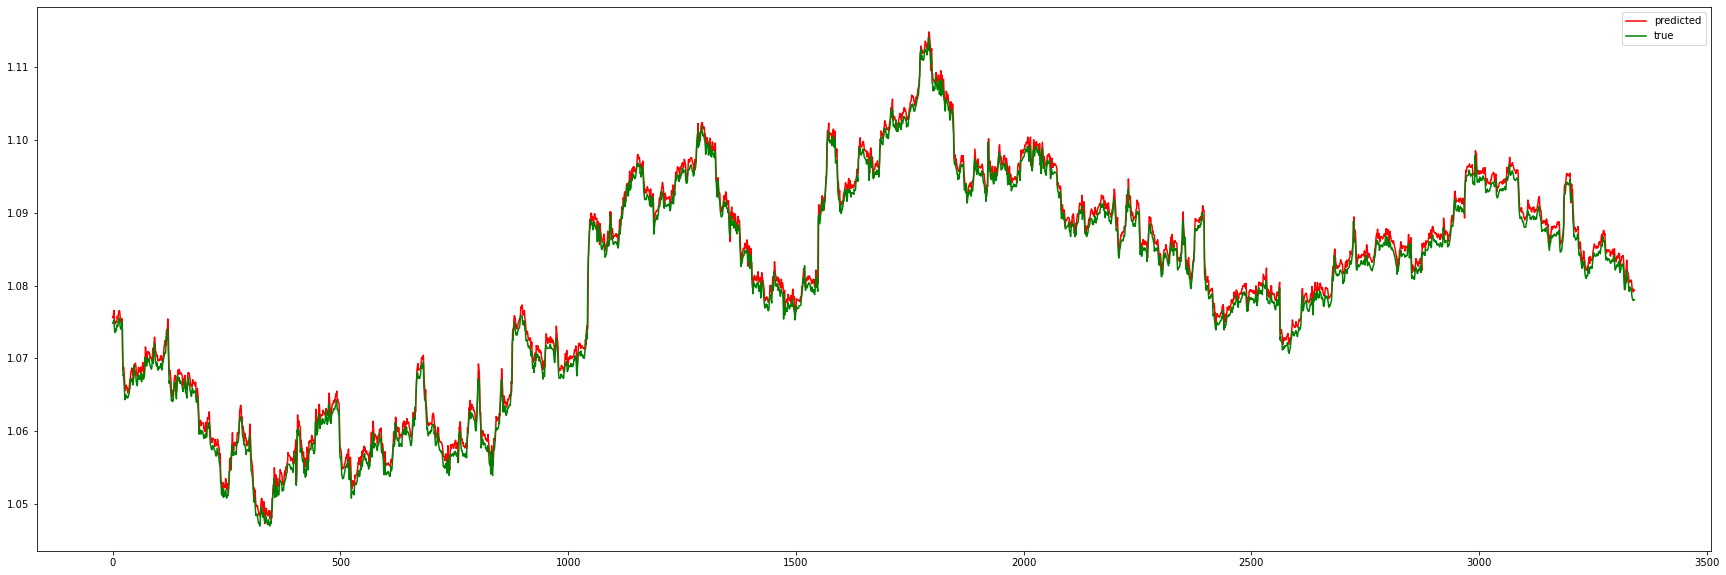

In [1064]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate_test['High_pred'], 'r', label='predicted')
plt.plot(df_evaluate_test['High'], 'g', label='true')
plt.legend();

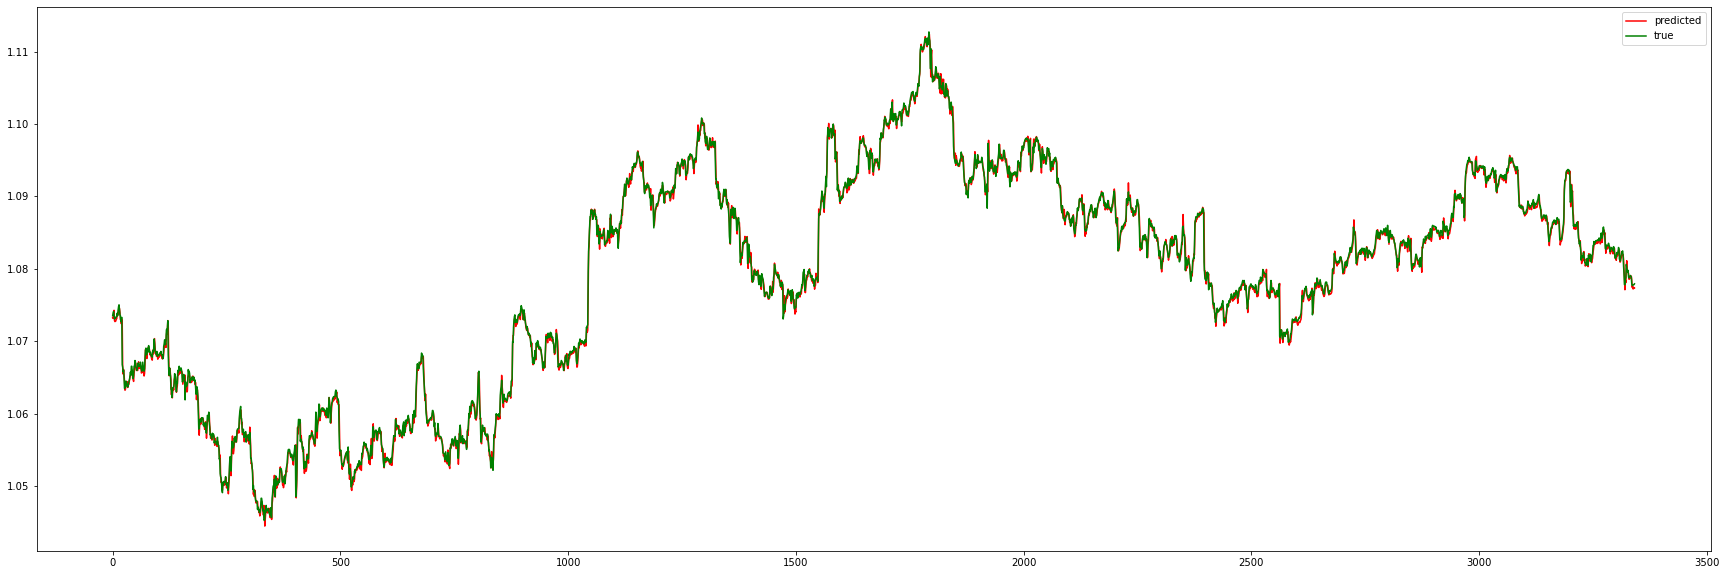

In [1065]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate_test['Low_pred'], 'r', label='predicted')
plt.plot(df_evaluate_test['Low'], 'g', label='true')
plt.legend();

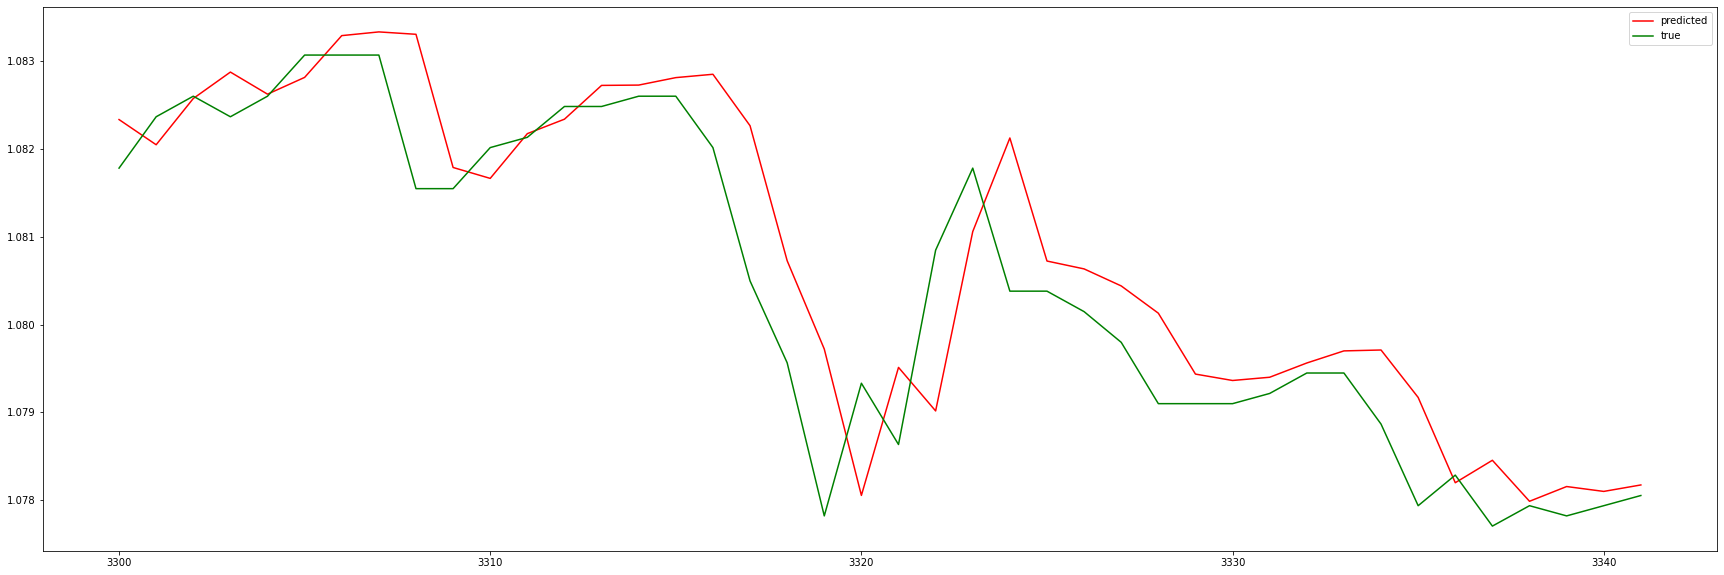

In [1066]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate_test['Close_pred'][3300:], 'r', label='predicted')
plt.plot(df_evaluate_test['Close'][3300:], 'g', label='true')
plt.legend();

In [1067]:
R2 = r2(df_evaluate_test['Close'],df_evaluate_test['Close_pred'])

In [1068]:
import math

In [1069]:
rmse = round(math.sqrt(mse(df_evaluate_test['Close'],df_evaluate_test['Close_pred'])), 5)

In [1070]:
round(mae(df_evaluate_test['Close'],df_evaluate_test['Close_pred']),5)

0.00065

In [1071]:
print(f' R2: {round(R2, 4)} RMSE: {rmse}')

 R2: 0.9959 RMSE: 0.00095


# Предсказание 12 часовых свечей тензором.

In [1165]:
df = pd.read_csv('hist_eurusd_1h.csv')

In [1166]:
df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-03-29 07:00:00+01:00,1.098901,1.101200,1.098780,1.100715,0,0.0,0.0
1,2022-03-29 08:00:00+01:00,1.100837,1.101928,1.100231,1.100352,0,0.0,0.0
2,2022-03-29 09:00:00+01:00,1.100231,1.100837,1.098177,1.098660,0,0.0,0.0
3,2022-03-29 10:00:00+01:00,1.098418,1.104728,1.097815,1.104118,0,0.0,0.0
4,2022-03-29 11:00:00+01:00,1.104118,1.106195,1.103875,1.104850,0,0.0,0.0
...,...,...,...,...,...,...,...,...
12411,2024-03-29 03:00:00+00:00,1.078167,1.078167,1.077702,1.077702,0,0.0,0.0
12412,2024-03-29 04:00:00+00:00,1.077819,1.077935,1.077819,1.077935,0,0.0,0.0
12413,2024-03-29 05:00:00+00:00,1.078051,1.078051,1.077819,1.077819,0,0.0,0.0
12414,2024-03-29 06:00:00+00:00,1.077819,1.078051,1.077819,1.077935,0,0.0,0.0


In [1167]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.shape

(12416, 8)

In [1168]:
df = df[['Datetime', 'Open', 'High', 'Low', 'Close']]

In [1169]:
df['rsi'] = ta.rsi(close = df.Close, lenght = 10)
df['ema'] = ta.ema(close = df.Close, lenght = 10)
df['sma'] = ta.sma(close = df.Close, lenght = 10)

/tmp/ipykernel_394938/2935102167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = ta.rsi(close = df.Close, lenght = 10)
/tmp/ipykernel_394938/2935102167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ema'] = ta.ema(close = df.Close, lenght = 10)


In [1170]:
x_len = 72 #анализируем 72 точек предыдущего периода
for i in range(x_len, 0, -1):
    df['Open'+str(i)+'h_back'] = df['Open'].shift(i, axis = 0)
    df['High'+str(i)+'h_back'] = df['High'].shift(i, axis = 0)
    df['Low'+str(i)+'h_back'] = df['Low'].shift(i, axis = 0)
    df['Close'+str(i)+'h_back'] = df['Close'].shift(i, axis = 0)    
    df['rsi'+str(i)+'h_back'] = df['rsi'].shift(i, axis = 0)
    df['ema'+str(i)+'h_back'] = df['ema'].shift(i, axis = 0)
    df['sma'+str(i)+'h_back'] = df['sma'].shift(i, axis = 0)

/tmp/ipykernel_394938/4225758025.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['rsi'+str(i)+'h_back'] = df['rsi'].shift(i, axis = 0)
/tmp/ipykernel_394938/4225758025.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ema'+str(i)+'h_back'] = df['ema'].shift(i, axis = 0)
/tmp/ipykernel_394938/4225758025.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

/tmp/ipykernel_394938/4225758025.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Open'+str(i)+'h_back'] = df['Open'].shift(i, axis = 0)
/tmp/ipykernel_394938/4225758025.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['High'+str(i)+'h_back'] = df['High'].shift(i, axis = 0)
/tmp/ipykernel_394938/4225758025.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

In [1171]:
df.shape

(12416, 512)

In [1172]:
df = df.dropna().reset_index()

In [1173]:
list(df.columns)

['index',
 'Datetime',
 'Open',
 'High',
 'Low',
 'Close',
 'rsi',
 'ema',
 'sma',
 'Open72h_back',
 'High72h_back',
 'Low72h_back',
 'Close72h_back',
 'rsi72h_back',
 'ema72h_back',
 'sma72h_back',
 'Open71h_back',
 'High71h_back',
 'Low71h_back',
 'Close71h_back',
 'rsi71h_back',
 'ema71h_back',
 'sma71h_back',
 'Open70h_back',
 'High70h_back',
 'Low70h_back',
 'Close70h_back',
 'rsi70h_back',
 'ema70h_back',
 'sma70h_back',
 'Open69h_back',
 'High69h_back',
 'Low69h_back',
 'Close69h_back',
 'rsi69h_back',
 'ema69h_back',
 'sma69h_back',
 'Open68h_back',
 'High68h_back',
 'Low68h_back',
 'Close68h_back',
 'rsi68h_back',
 'ema68h_back',
 'sma68h_back',
 'Open67h_back',
 'High67h_back',
 'Low67h_back',
 'Close67h_back',
 'rsi67h_back',
 'ema67h_back',
 'sma67h_back',
 'Open66h_back',
 'High66h_back',
 'Low66h_back',
 'Close66h_back',
 'rsi66h_back',
 'ema66h_back',
 'sma66h_back',
 'Open65h_back',
 'High65h_back',
 'Low65h_back',
 'Close65h_back',
 'rsi65h_back',
 'ema65h_back',
 'sma

In [1174]:
X = df.drop(['index', 'Datetime', 'Open', 'High', 'Low', 'Close','rsi', 'ema', 'sma', 'Open11h_back',
 'High11h_back', 'Low11h_back', 'Close11h_back', 'rsi11h_back', 'ema11h_back', 'sma11h_back', 'Open10h_back', 'High10h_back',
 'Low10h_back', 'Close10h_back', 'rsi10h_back', 'ema10h_back', 'sma10h_back', 'Open9h_back', 'High9h_back', 'Low9h_back',
 'Close9h_back', 'rsi9h_back', 'ema9h_back', 'sma9h_back', 'Open8h_back', 'High8h_back', 'Low8h_back', 'Close8h_back',
 'rsi8h_back', 'ema8h_back', 'sma8h_back', 'Open7h_back', 'High7h_back', 'Low7h_back', 'Close7h_back', 'rsi7h_back',
 'ema7h_back', 'sma7h_back', 'Open6h_back', 'High6h_back', 'Low6h_back', 'Close6h_back', 'rsi6h_back', 'ema6h_back',
 'sma6h_back', 'Open5h_back', 'High5h_back', 'Low5h_back', 'Close5h_back', 'rsi5h_back', 'ema5h_back', 'sma5h_back',
 'Open4h_back', 'High4h_back', 'Low4h_back', 'Close4h_back', 'rsi4h_back', 'ema4h_back', 'sma4h_back', 'Open3h_back',
 'High3h_back', 'Low3h_back', 'Close3h_back', 'rsi3h_back', 'ema3h_back', 'sma3h_back', 'Open2h_back', 'High2h_back',
 'Low2h_back', 'Close2h_back', 'rsi2h_back', 'ema2h_back', 'sma2h_back', 'Open1h_back', 'High1h_back', 'Low1h_back',
 'Close1h_back', 'rsi1h_back', 'ema1h_back','sma1h_back'], axis = 1)

In [1175]:
X.columns

Index(['Open72h_back', 'High72h_back', 'Low72h_back', 'Close72h_back',
       'rsi72h_back', 'ema72h_back', 'sma72h_back', 'Open71h_back',
       'High71h_back', 'Low71h_back',
       ...
       'rsi13h_back', 'ema13h_back', 'sma13h_back', 'Open12h_back',
       'High12h_back', 'Low12h_back', 'Close12h_back', 'rsi12h_back',
       'ema12h_back', 'sma12h_back'],
      dtype='object', length=427)

In [1176]:
X.shape

(12330, 427)

In [1177]:
X = scaler.fit_transform(X)
X.shape

(12330, 427)

In [1178]:
X = X.reshape(12330, 61, 7)
X.shape

(12330, 61, 7)

In [1179]:
X_train = X[:8220]

X_train.shape

(8220, 61, 7)

In [1180]:
X_test = X[8220:]

X_test.shape

(4110, 61, 7)

In [1181]:
y = np.array(df[['Open11h_back', 'High11h_back', 'Low11h_back', 'Close11h_back', 'Open10h_back', 'High10h_back', 'Low10h_back',
 'Close10h_back', 'Open9h_back', 'High9h_back', 'Low9h_back', 'Close9h_back', 'Open8h_back', 'High8h_back', 'Low8h_back', 'Close8h_back', 'Open7h_back', 'High7h_back',
 'Low7h_back', 'Close7h_back', 'Open6h_back', 'High6h_back', 'Low6h_back', 'Close6h_back', 'Open5h_back', 'High5h_back',
 'Low5h_back', 'Close5h_back', 'Open4h_back', 'High4h_back', 'Low4h_back', 'Close4h_back', 'Open3h_back', 'High3h_back',
 'Low3h_back', 'Close3h_back', 'Open2h_back', 'High2h_back', 'Low2h_back', 'Close2h_back', 'Open1h_back', 'High1h_back',
 'Low1h_back', 'Close1h_back', 'Open', 'High', 'Low', 'Close']])
y.shape

(12330, 48)

In [1182]:
y_train = y[:8220]

y_train.shape

(8220, 48)

In [1183]:
y_test = y[8220:]

y_test.shape

(4110, 48)

In [1184]:
model = Sequential()
model.add(LSTM(128, input_shape=(61, 7)))
model.add(Dense(48, activation='elu'))


model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 128)               69632     
                                                                 
 dense_23 (Dense)            (None, 48)                6192      
                                                                 
Total params: 75824 (296.19 KB)
Trainable params: 75824 (296.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1185]:
# %%time
# model.fit(X_train, y_train,
#           epochs=5000,
#           validation_data=(X_test, y_test),
#           batch_size=128
#           )

In [1186]:
# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
# model.save("my_model_lstm_1h_12.keras")

In [1187]:
# It can be used to reconstruct the model identically.
model = keras.models.load_model("my_model_lstm_1h_12.keras")

In [1188]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 2s 11ms/step - loss: 5.4102e-06 - mae: 0.0016


[5.410180619946914e-06, 0.0016187365399673581]

# 12 1h предсказанная свеча train (предсказание на 12 торговых часов). Графики

In [1189]:
y_list = ['Open11h_back', 'High11h_back', 'Low11h_back', 'Close11h_back', 'Open10h_back', 'High10h_back', 'Low10h_back',
 'Close10h_back', 'Open9h_back', 'High9h_back', 'Low9h_back', 'Close9h_back', 'Open8h_back', 'High8h_back', 'Low8h_back',
 'Close8h_back', 'Open7h_back', 'High7h_back', 'Low7h_back', 'Close7h_back', 'Open6h_back', 'High6h_back', 'Low6h_back',
 'Close6h_back', 'Open5h_back', 'High5h_back', 'Low5h_back', 'Close5h_back', 'Open4h_back', 'High4h_back', 'Low4h_back',
 'Close4h_back', 'Open3h_back', 'High3h_back', 'Low3h_back', 'Close3h_back', 'Open2h_back', 'High2h_back', 'Low2h_back',
 'Close2h_back', 'Open1h_back', 'High1h_back', 'Low1h_back', 'Close1h_back', 'Open', 'High', 'Low', 'Close']

In [1190]:
y_pred_list = ['Open1', 'High1', 'Close1', 'Open2', 'High2', 'Low2', 'Close2', 'Open3', 'High3', 'Low3', 'Close3',
 'Open4', 'High4', 'Low4', 'Close4', 'Open5', 'High5', 'Low5' 'Close5', 'Open6', 'High6', 'Low6', 'Close6', 'Open7',
 'High7', 'Low7', 'Close7', 'Open8', 'High8', 'Low8', 'Close8', 'Open9', 'High9', 'Low9', 'Close9', 'Open10', 'High10',
 'Low10', 'Close10', 'Open11', 'High11', 'Low11', 'Close11', 'Open12', 'High12', 'Low12', 'Close12']

In [1191]:
y_train_pred = np.array(model.predict(X_train))
y_train_pred.shape

257/257 [==============================] - 3s 12ms/step


(8220, 48)

In [1192]:
df_evaluate = pd.DataFrame(y_train, columns = y_list)
df_evaluate[['Open1', 'High1', 'Low1', 'Close1', 'Open2', 'High2', 'Low2', 'Close2', 'Open3', 'High3', 'Low3', 'Close3', 'Open4',
 'High4', 'Low4', 'Close4', 'Open5', 'High5', 'Low5', 'Close5', 'Open6', 'High6', 'Low6', 'Close6', 'Open7', 'High7',
 'Low7', 'Close7', 'Open8', 'High8', 'Low8', 'Close8', 'Open9', 'High9', 'Low9', 'Close9', 'Open10', 'High10', 'Low10',
 'Close10', 'Open11', 'High11', 'Low11', 'Close11', 'Open12', 'High12', 'Low12', 'Close12']] = y_train_pred
df_evaluate

,Open11h_back,High11h_back,Low11h_back,Close11h_back,Open10h_back,High10h_back,Low10h_back,Close10h_back,Open9h_back,High9h_back,...,Low10,Close10,Open11,High11,Low11,Close11,Open12,High12,Low12,Close12
0,1.105950,1.106195,1.104484,1.105828,1.106439,1.106929,1.105217,1.106929,1.106684,1.106684,...,1.105870,1.106429,1.106498,1.107373,1.105488,1.106175,1.106248,1.106891,1.105210,1.106071
1,1.106439,1.106929,1.105217,1.106929,1.106684,1.106684,1.105461,1.105461,1.105339,1.106195,...,1.105063,1.105511,1.105661,1.106542,1.104659,1.105371,1.105449,1.106047,1.104361,1.105262
2,1.106684,1.106684,1.105461,1.105461,1.105339,1.106195,1.104362,1.104850,1.104606,1.105705,...,1.106354,1.107011,1.107069,1.108054,1.106004,1.106890,1.106738,1.107522,1.105724,1.106615
3,1.105339,1.106195,1.104362,1.104850,1.104606,1.105705,1.104240,1.104850,1.104728,1.105094,...,1.104965,1.105503,1.105591,1.106505,1.104629,1.105332,1.105439,1.106097,1.104330,1.105208
4,1.104606,1.105705,1.104240,1.104850,1.104728,1.105094,1.103144,1.103997,1.104118,1.104850,...,1.104401,1.104951,1.105039,1.105936,1.104043,1.104740,1.104822,1.105490,1.103747,1.104633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,1.104240,1.104484,1.102901,1.102901,1.102779,1.103144,1.101807,1.102414,1.102414,1.103266,...,1.103142,1.103663,1.103780,1.104697,1.102942,1.103597,1.103686,1.104432,1.102453,1.103295
8216,1.102779,1.103144,1.101807,1.102414,1.102414,1.103266,1.101928,1.102779,1.102657,1.102901,...,1.102358,1.102918,1.103004,1.103975,1.102176,1.102805,1.102870,1.103696,1.101769,1.102547
8217,1.102414,1.103266,1.101928,1.102779,1.102657,1.102901,1.102293,1.102657,1.102657,1.102657,...,1.101800,1.102324,1.102452,1.103376,1.101575,1.102193,1.102316,1.103089,1.101126,1.101994
8218,1.102657,1.102901,1.102293,1.102657,1.102657,1.102657,1.101807,1.102050,1.101928,1.101928,...,1.102146,1.102739,1.102847,1.103791,1.101892,1.102594,1.102629,1.103474,1.101453,1.102368


In [1193]:
df_evaluate = df_evaluate[['Open', 'High', 'Low', 'Close','Open12', 'High12', 'Low12', 'Close12']]
df_evaluate

,Open,High,Low,Close,Open12,High12,Low12,Close12
0,1.105094,1.105583,1.104850,1.105094,1.106248,1.106891,1.105210,1.106071
1,1.104850,1.104850,1.104850,1.104850,1.105449,1.106047,1.104361,1.105262
2,1.104606,1.105217,1.104362,1.104850,1.106738,1.107522,1.105724,1.106615
3,1.104972,1.105828,1.104850,1.105339,1.105439,1.106097,1.104330,1.105208
4,1.105217,1.105828,1.104728,1.105583,1.104822,1.105490,1.103747,1.104633
...,...,...,...,...,...,...,...,...
8215,1.101443,1.101564,1.100837,1.100958,1.103686,1.104432,1.102453,1.103295
8216,1.100958,1.101564,1.100837,1.101564,1.102870,1.103696,1.101769,1.102547
8217,1.101564,1.102050,1.101079,1.101322,1.102316,1.103089,1.101126,1.101994
8218,1.101564,1.103266,1.101443,1.102293,1.102629,1.103474,1.101453,1.102368


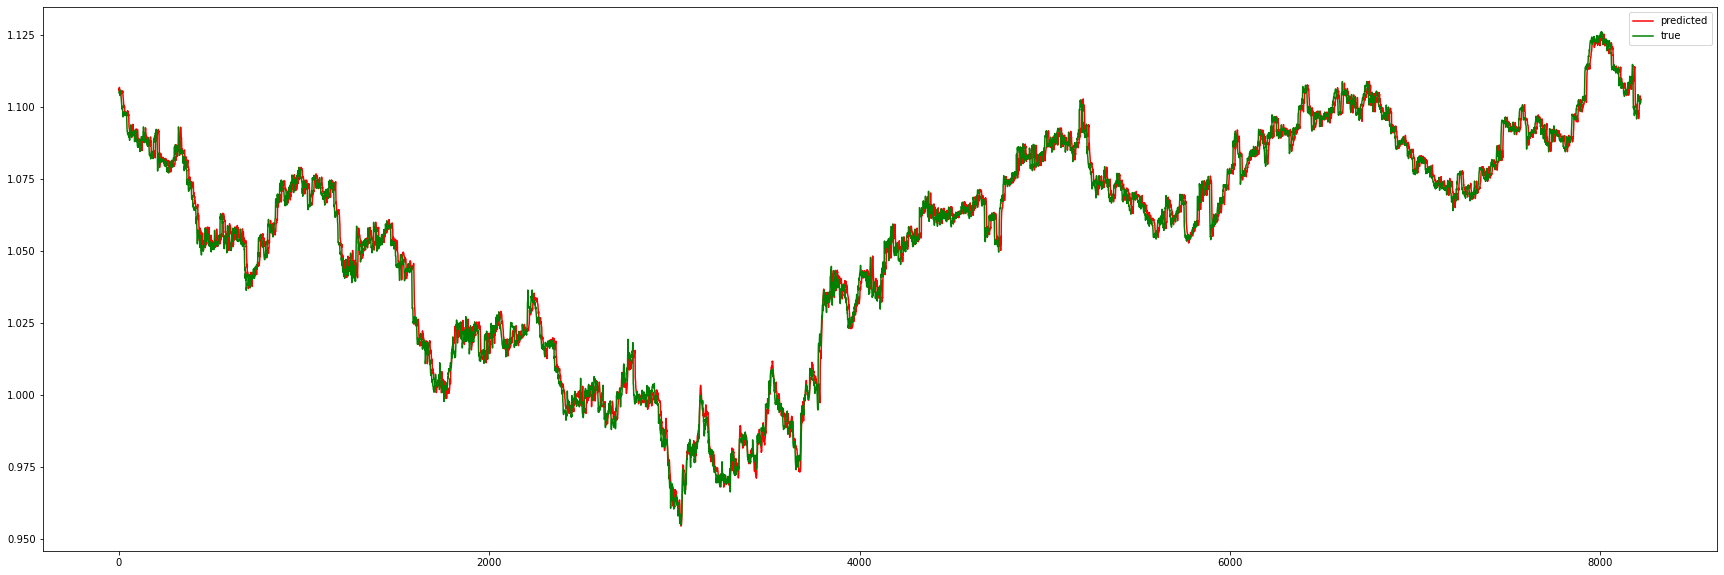

In [1194]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Open12'], 'r', label='predicted')
plt.plot(df_evaluate['Open'], 'g', label='true')
plt.legend();

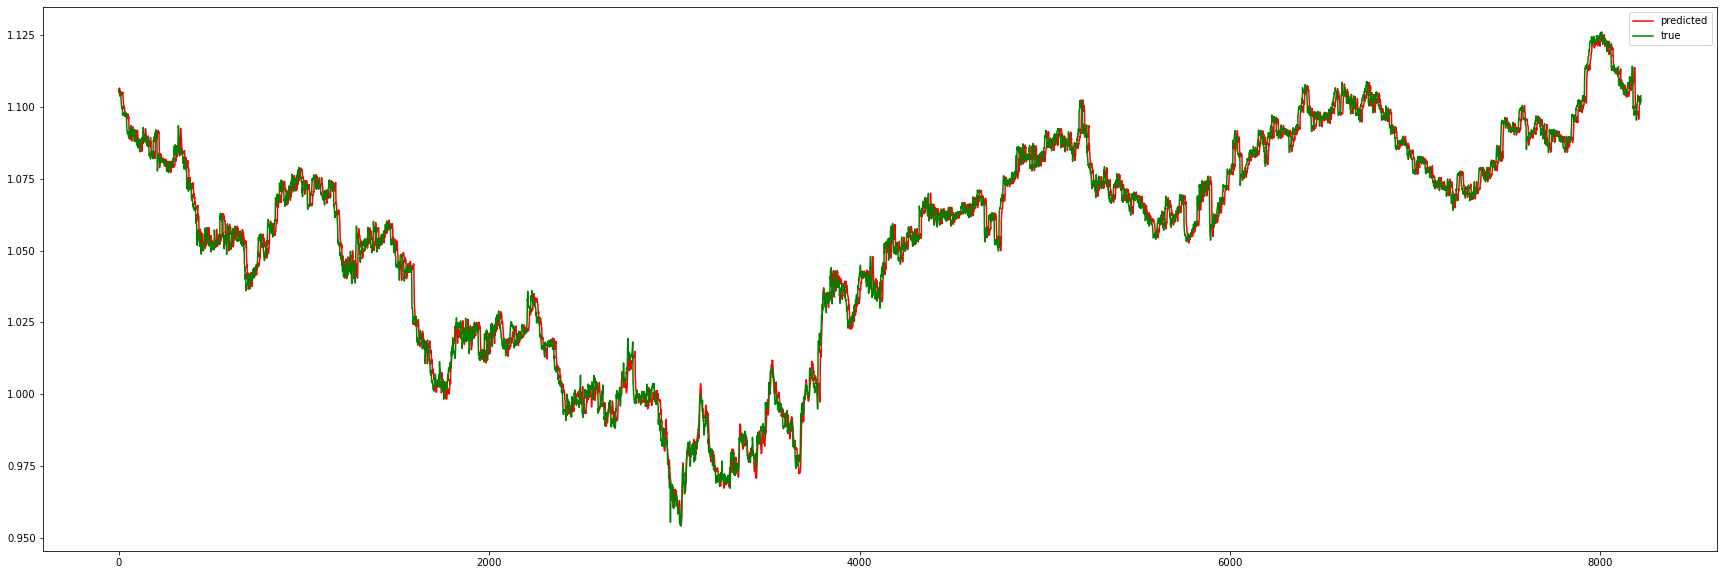

In [1195]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Close12'], 'r', label='predicted')
plt.plot(df_evaluate['Close'], 'g', label='true')
plt.legend();

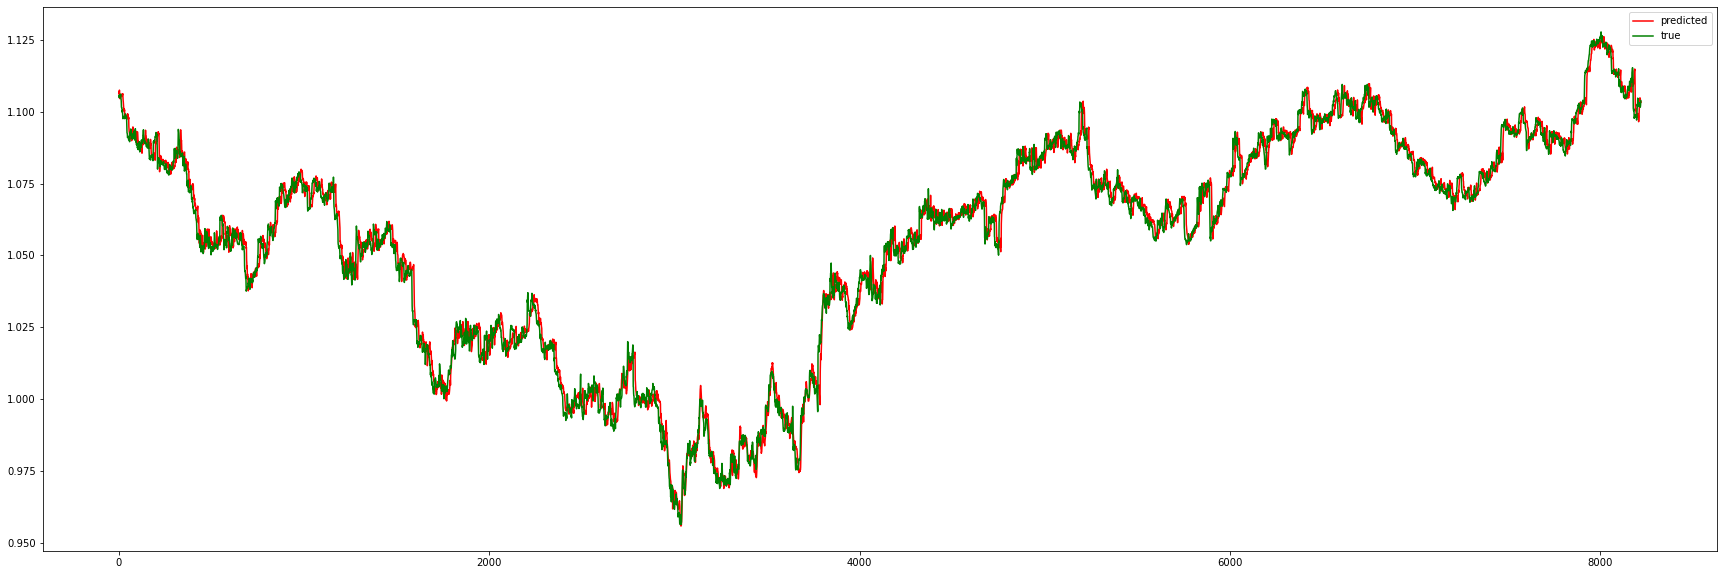

In [1196]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['High12'], 'r', label='predicted')
plt.plot(df_evaluate['High'], 'g', label='true')
plt.legend();

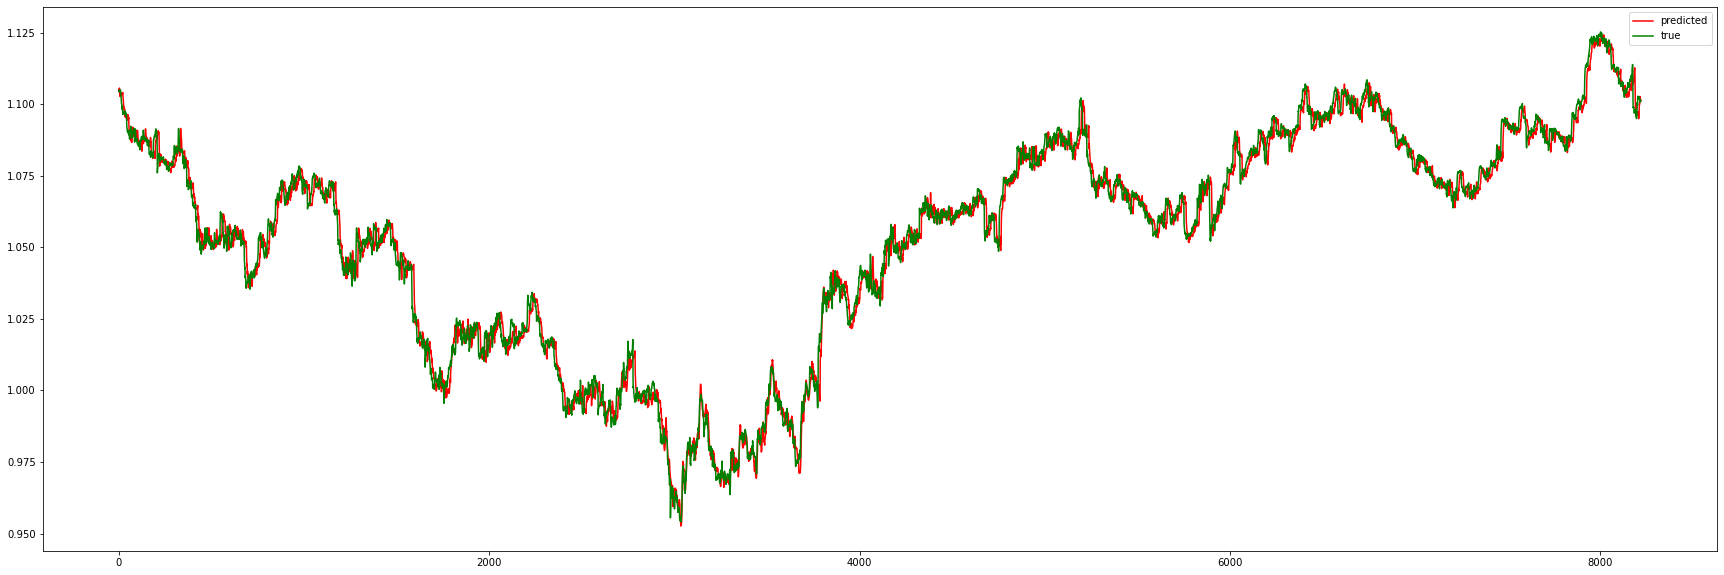

In [1197]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Low12'], 'r', label='predicted')
plt.plot(df_evaluate['Low'], 'g', label='true')
plt.legend();

# 12 1h предсказанная свеча test (предсказание на 12 торговых часов). Графики

In [1198]:
y_test_pred = np.array(model.predict(X_test))
y_test_pred.shape

129/129 [==============================] - 1s 11ms/step


(4110, 48)

In [1199]:
r2(y_test, y_test_pred)

0.9732999091306022

In [1200]:
mse(y_test, y_test_pred)

5.41018129241705e-06

In [1201]:
import math
math.sqrt(mse(y_test, y_test_pred))

0.0023259796414450942

In [1202]:
round(mae(y_test, y_test_pred), 5)

0.00162

In [1203]:
print(f' R2: {round(r2(y_test, y_test_pred), 4)} RMSE: {round(math.sqrt(mse(y_test, y_test_pred)),4)}, MAE {round(mae(y_test, y_test_pred), 5)}')

 R2: 0.9733 RMSE: 0.0023, MAE 0.00162


In [1204]:
df_evaluate = pd.DataFrame(y_test, columns = y_list)
df_evaluate[['Open1', 'High1', 'Low1', 'Close1', 'Open2', 'High2', 'Low2', 'Close2', 'Open3', 'High3', 'Low3', 'Close3', 'Open4',
 'High4', 'Low4', 'Close4', 'Open5', 'High5', 'Low5', 'Close5', 'Open6', 'High6', 'Low6', 'Close6', 'Open7', 'High7',
 'Low7', 'Close7', 'Open8', 'High8', 'Low8', 'Close8', 'Open9', 'High9', 'Low9', 'Close9', 'Open10', 'High10', 'Low10',
 'Close10', 'Open11', 'High11', 'Low11', 'Close11','Open12', 'High12', 'Low12', 'Close12' ]] = y_test_pred
df_evaluate

,Open11h_back,High11h_back,Low11h_back,Close11h_back,Open10h_back,High10h_back,Low10h_back,Close10h_back,Open9h_back,High9h_back,...,Low10,Close10,Open11,High11,Low11,Close11,Open12,High12,Low12,Close12
0,1.101928,1.101928,1.101928,1.101928,1.103022,1.103144,1.102657,1.102657,1.102657,1.103022,...,1.101467,1.102047,1.102174,1.103128,1.101203,1.101925,1.101977,1.102822,1.100766,1.101716
1,1.103022,1.103144,1.102657,1.102657,1.102657,1.103022,1.102293,1.102536,1.102657,1.102901,...,1.101372,1.102057,1.102131,1.103116,1.101083,1.101877,1.101929,1.102823,1.100663,1.101683
2,1.102657,1.103022,1.102293,1.102536,1.102657,1.102901,1.101807,1.101807,1.101322,1.101928,...,1.102277,1.103020,1.103069,1.104115,1.102032,1.102907,1.102783,1.103791,1.101615,1.102598
3,1.102657,1.102901,1.101807,1.101807,1.101322,1.101928,1.101322,1.101807,1.101807,1.102050,...,1.101975,1.102633,1.102718,1.103677,1.101715,1.102486,1.102533,1.103397,1.101264,1.102250
4,1.101322,1.101928,1.101322,1.101807,1.101807,1.102050,1.101564,1.101564,1.101443,1.101564,...,1.101266,1.101891,1.101993,1.102962,1.101001,1.101754,1.101776,1.102644,1.100598,1.101529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,1.080264,1.080847,1.079564,1.080147,1.080147,1.080497,1.079797,1.079797,1.079914,1.080147,...,1.079969,1.080818,1.080799,1.081826,1.079741,1.080619,1.080655,1.081571,1.079429,1.080404
4106,1.080147,1.080497,1.079797,1.079797,1.079914,1.080147,1.078865,1.079098,1.079098,1.079214,...,1.079681,1.080449,1.080474,1.081511,1.079447,1.080327,1.080336,1.081248,1.079120,1.080090
4107,1.079914,1.080147,1.078865,1.079098,1.079098,1.079214,1.078749,1.079098,1.079098,1.079214,...,1.079482,1.080298,1.080287,1.081365,1.079249,1.080160,1.080159,1.081119,1.078936,1.079929
4108,1.079098,1.079214,1.078749,1.079098,1.079098,1.079214,1.078865,1.079098,1.079331,1.079797,...,1.078750,1.079480,1.079507,1.080572,1.078519,1.079402,1.079377,1.080302,1.078190,1.079158


In [1216]:
y_test_evaluate = np.array(df_evaluate[['Open', 'High', 'Low', 'Close']])
y_test_evaluate_pred = np.array(df_evaluate[['Open12', 'High12', 'Low12', 'Close12']])

In [1218]:
print(f' R2: {round(r2(y_test_evaluate, y_test_evaluate_pred), 4)} RMSE: {round(math.sqrt(mse(y_test_evaluate, y_test_evaluate_pred)),4)}, MAE {round(mae(y_test_evaluate, y_test_evaluate_pred), 5)}')

 R2: 0.9533 RMSE: 0.0031, MAE 0.00223


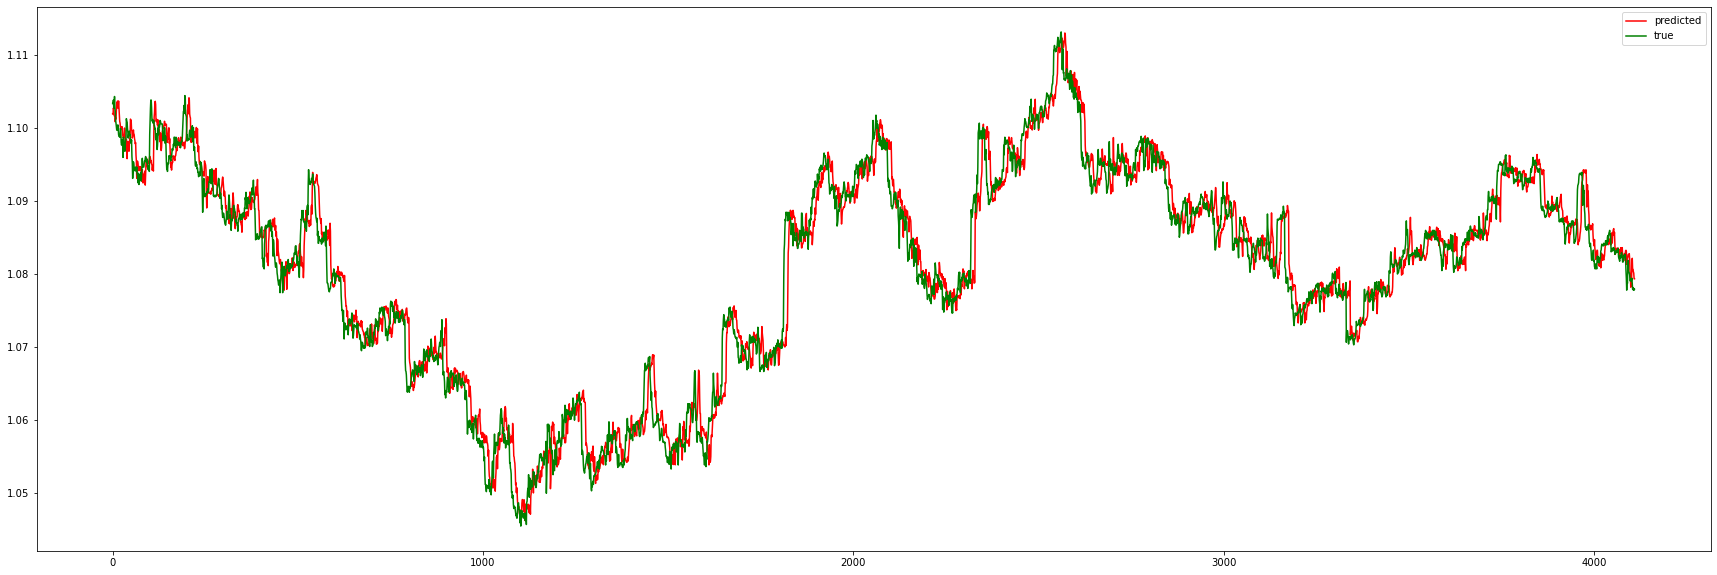

In [1205]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Open12'], 'r', label='predicted')
plt.plot(df_evaluate['Open'], 'g', label='true')
plt.legend();

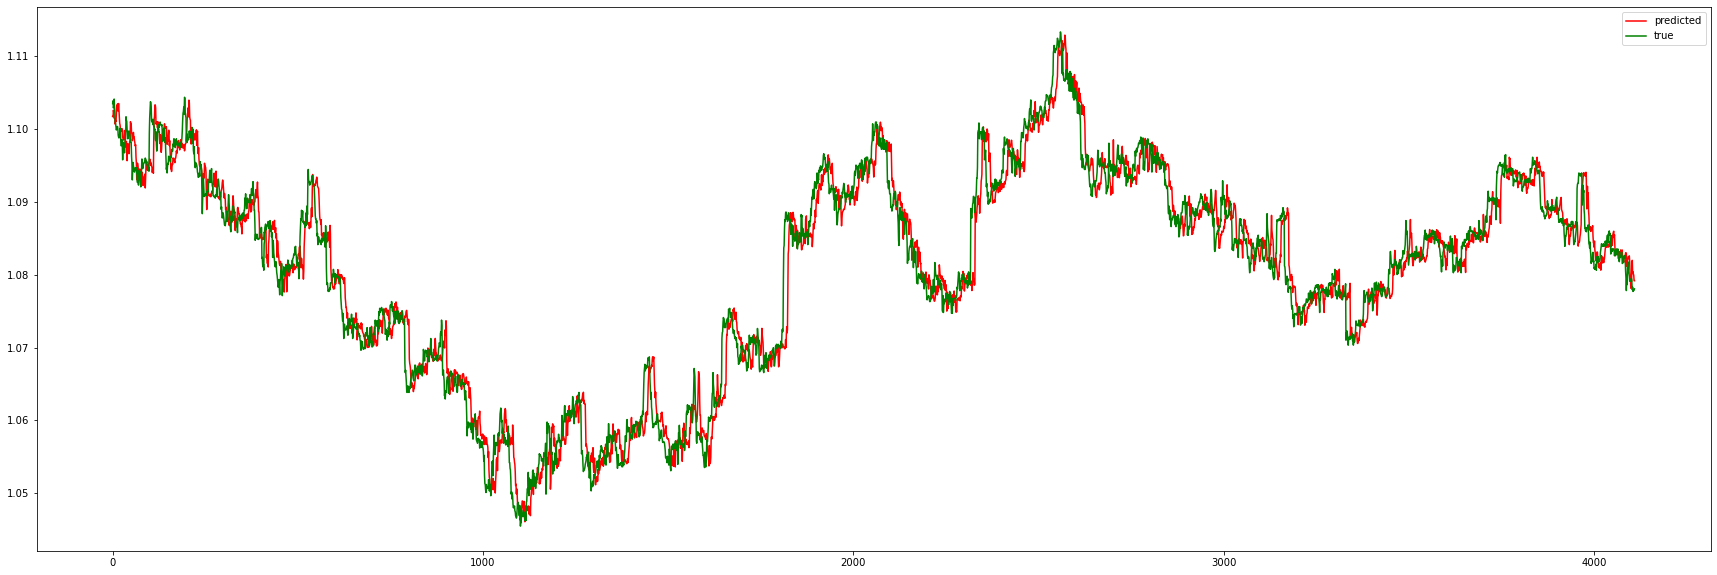

In [1206]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Close12'], 'r', label='predicted')
plt.plot(df_evaluate['Close'], 'g', label='true')
plt.legend();

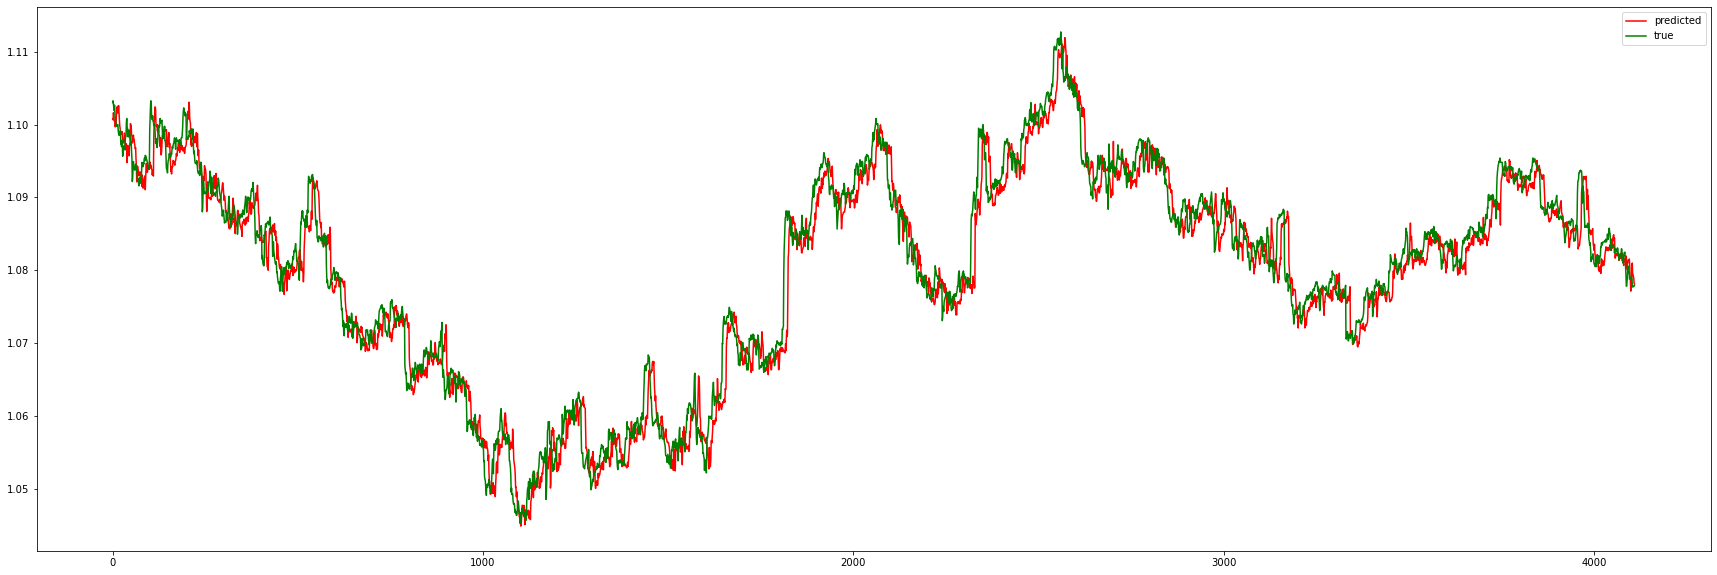

In [1207]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Low12'], 'r', label='predicted')
plt.plot(df_evaluate['Low'], 'g', label='true')
plt.legend();

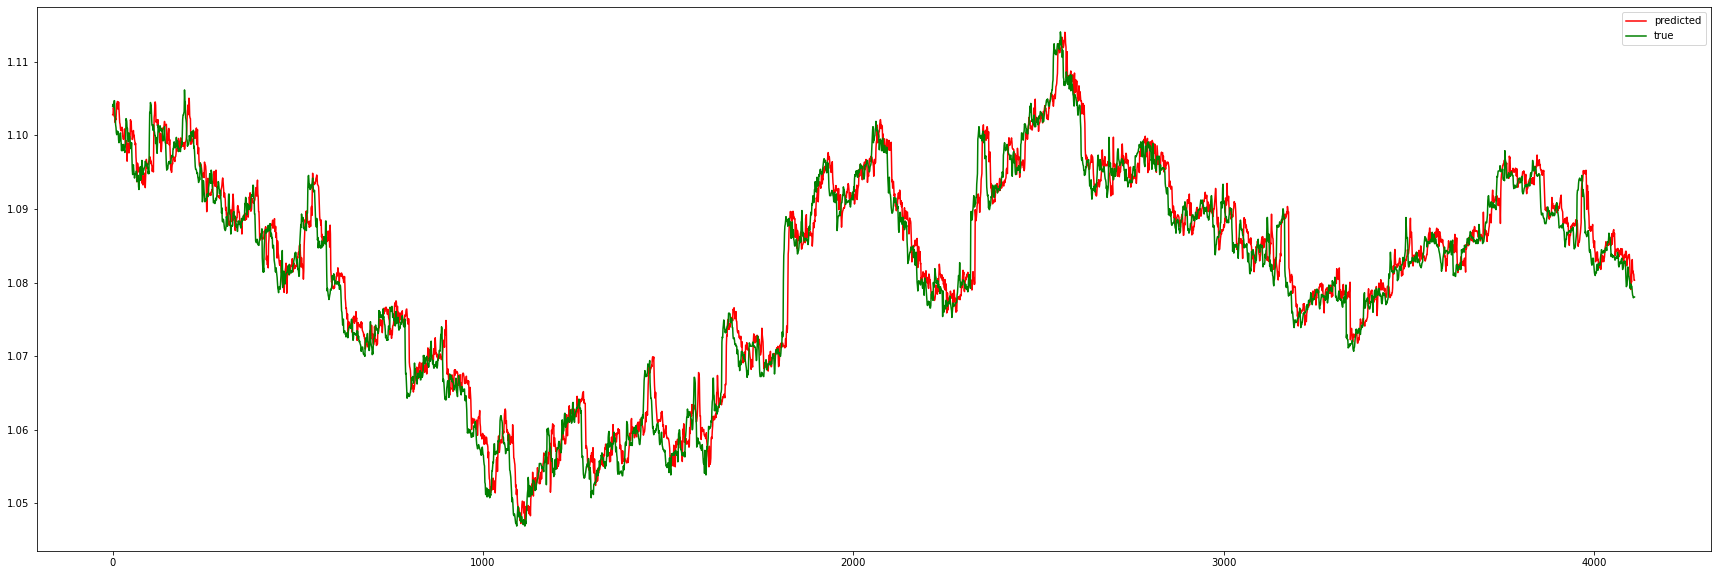

In [1208]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['High12'], 'r', label='predicted')
plt.plot(df_evaluate['High'], 'g', label='true')
plt.legend();

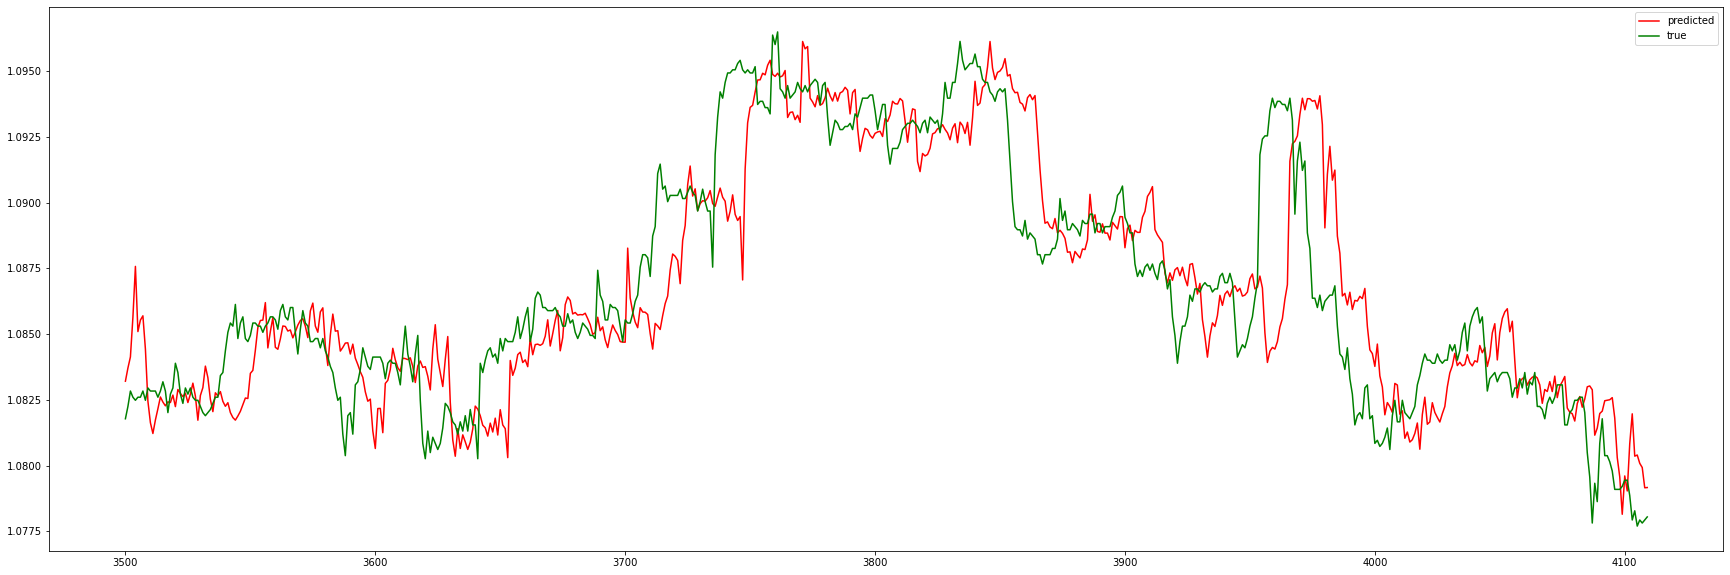

In [1209]:
plt.figure(figsize = (30, 10))
plt.plot(df_evaluate['Close12'][3500:], 'r', label='predicted')
plt.plot(df_evaluate['Close'][3500:], 'g', label='true')
plt.legend();

## Построчный анализ тестфакт vs предcказанный тестфакт 12 свечей

In [1116]:
line = 185

In [1117]:
y_test_last_point = df_evaluate[['Open11h_back', 'High11h_back', 'Low11h_back', 'Close11h_back',
       'Open10h_back', 'High10h_back', 'Low10h_back', 'Close10h_back',
       'Open9h_back', 'High9h_back', 'Low9h_back', 'Close9h_back',
       'Open8h_back', 'High8h_back', 'Low8h_back', 'Close8h_back',
       'Open7h_back', 'High7h_back', 'Low7h_back', 'Close7h_back',
       'Open6h_back', 'High6h_back', 'Low6h_back', 'Close6h_back',
       'Open5h_back', 'High5h_back', 'Low5h_back', 'Close5h_back',
       'Open4h_back', 'High4h_back', 'Low4h_back', 'Close4h_back',
       'Open3h_back', 'High3h_back', 'Low3h_back', 'Close3h_back',
       'Open2h_back', 'High2h_back', 'Low2h_back', 'Close2h_back',
       'Open1h_back', 'High1h_back', 'Low1h_back', 'Close1h_back', 'Open',
       'High', 'Low', 'Close']][line:line+1]
y_test_last_point_pred = df_evaluate[['Open1', 'High1', 'Low1', 'Close1', 'Open2',
       'High2', 'Low2', 'Close2', 'Open3', 'High3', 'Low3', 'Close3', 'Open4',
       'High4', 'Low4', 'Close4', 'Open5', 'High5', 'Low5', 'Close5', 'Open6',
       'High6', 'Low6', 'Close6', 'Open7', 'High7', 'Low7', 'Close7', 'Open8',
       'High8', 'Low8', 'Close8', 'Open9', 'High9', 'Low9', 'Close9', 'Open10',
       'High10', 'Low10', 'Close10', 'Open11', 'High11', 'Low11', 'Close11',
       'Open12', 'High12', 'Low12', 'Close12']][line:line+1]
y_test_last_point_open = df_evaluate[['Open11h_back', 'Open10h_back', 'Open9h_back', 'Open8h_back', 'Open7h_back', 'Open6h_back', 'Open5h_back', 'Open4h_back', 'Open3h_back','Open2h_back', 'Open1h_back', 'Open']][line:line+1]
y_test_last_point_pred_open = df_evaluate[['Open1', 'Open2', 'Open3', 'Open4', 'Open5', 'Open6', 'Open7', 'Open8', 'Open9', 'Open10', 'Open11', 'Open12']][line:line+1]
y_test_last_point_pred_open = np.array(y_test_last_point_pred_open).flatten()
y_test_last_point_open = np.array(y_test_last_point_open).flatten()

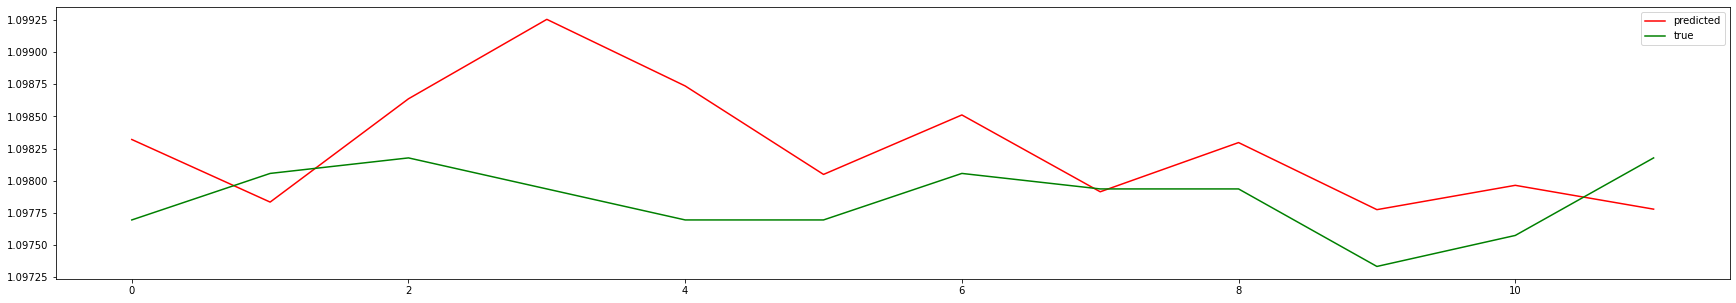

In [1118]:
# open
plt.figure(figsize = (30, 5))
plt.plot(y_test_last_point_pred_open , 'r', label='predicted')
plt.plot(y_test_last_point_open, 'g', label='true')
plt.legend();

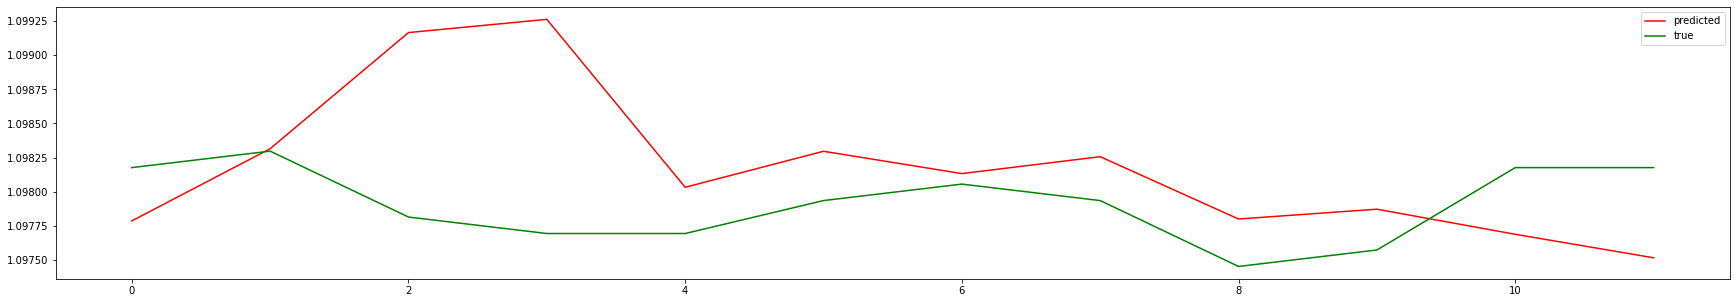

In [1119]:
# close
y_test_last_point_close = df_evaluate[['Close11h_back', 'Close10h_back', 'Close9h_back', 'Close8h_back', 'Close7h_back', 'Close6h_back', 'Close5h_back', 'Close4h_back', 'Close3h_back','Close2h_back', 'Close1h_back', 'Close']][line:line+1]
y_test_last_point_pred_close = df_evaluate[['Close1', 'Close2', 'Close3', 'Close4', 'Close5', 'Close6', 'Close7', 'Close8', 'Close9', 'Close10', 'Close11', 'Close12']][line:line+1]
y_test_last_point_pred_close = np.array(y_test_last_point_pred_close).flatten()
y_test_last_point_close = np.array(y_test_last_point_close).flatten()
plt.figure(figsize = (30, 5))
plt.plot(y_test_last_point_pred_close , 'r', label='predicted')
plt.plot(y_test_last_point_close, 'g', label='true')
plt.legend();

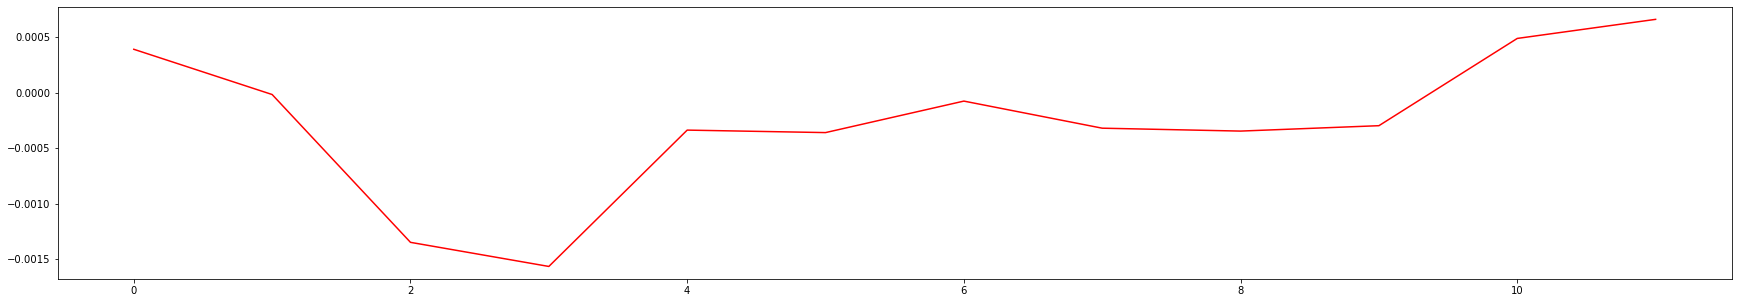

In [1120]:
# close mistake
y_test_last_point_close_true_pred = y_test_last_point_close-y_test_last_point_pred_close
plt.figure(figsize = (30, 5))
plt.plot(y_test_last_point_close_true_pred , 'r', label='predicted')

In [1163]:
# ошибка по 12 предсказанным свечам в пунктах. Пример
y_test_last_point_close_true_pred*100000

array([  39.00527954,   -1.76429749, -134.96875763, -156.68869019,
        -33.83159637,  -36.07273102,   -7.68899918,  -32.10306168,
        -34.71374512,  -29.8500061 ,   48.78044128,   65.97042084])

Вывод: Модель на базе рекуррентной нейронной сети lstm предсказания курса валюты eurusd 1 часовая свеча (предсказываем свечу open, close, high, low через час)) на основе предыдущих 60 часовых свечей с учеторм рассчитанных показателей sma, ema, rsi показала на тестовых данных  R2: 0.9959 RMSE: 0.00095. Это довольно высокий показатель. Модель предсказания 12 последующих свечей на базе 60 предыдущих (плюс sma, ema, rsi) показала на тесте 12-ти предсказанных свечей  R2: 0.9733 RMSE: 0.0023, MAE 0.00162. Прогноз последней 12-й свечи показал метрики R2: 0.9533 RMSE: 0.0031, MAE 0.00223. Данные модели могут быть использованы в ансамбле моделей для формирования торговой стратегии на forex на краткосрочный период.